In [1]:
%matplotlib inline
# donne e uomini - rapporto corpo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
from pandas import DataFrame

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(15.0, 15.0/golden))


sondaggio = pd.read_csv('risposte.csv', sep=',', index_col=False)
def barre(diag_x,diag_y,mycolors,titolo,salva):
    plt.bar(diag_x,diag_y, color=mycolors, width = 0.4)
    plt.xticks(fontsize=12)
    plt.title(titolo)
    plt.savefig(salva)

def vero_falso(ve,fa,valori,titolo,salva):
    x_axis = np.arange(len(valori))
    plt.bar(x_axis -0.1, ve, width=0.2, label = 'Vero', color="#e66101")
    plt.bar(x_axis +0.1, fa, width=0.2, label = 'Falso', color="#fdb863")
    plt.xticks(x_axis, valori)
    plt.legend()
    plt.title(titolo)
    plt.savefig(salva)
    
def torta(dato,mylabels,mycolors,titolo,salva,myexplode=None):
    plt.title(titolo)
    plt.pie(dato, labels = mylabels, startangle=250, explode = myexplode,  autopct='%1.1f%%', colors=mycolors,textprops={'fontsize':25 } )
    plt.savefig(salva)

def si_no_po(si,no,po,valori,titolo,salva):
    x_axis = np.arange(len(valori))
    plt.bar(x_axis -0.1, si, width=0.2, label = 'Sì', color="#ca0020")
    plt.bar(x_axis +0.1, po, width=0.2, label = "Un po'", color="#fdb863")
    plt.bar(x_axis +0.3, no, width=0.2, label = 'No', color='#bcbddc')

    plt.xticks(x_axis, valori)
    plt.legend()
    plt.title(titolo)
    plt.savefig(salva)

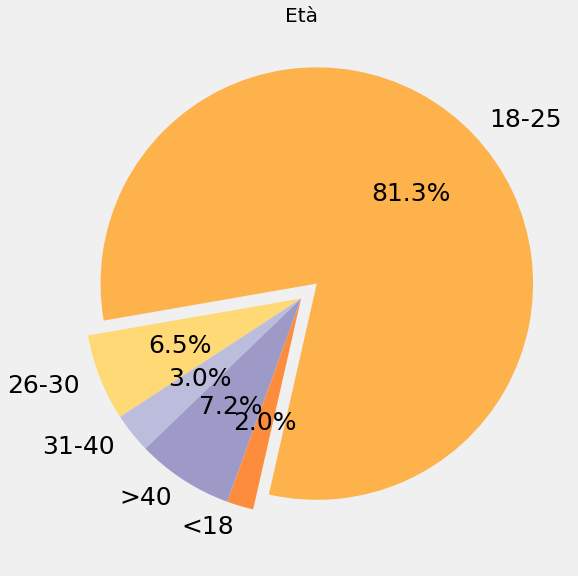

In [2]:
eta = sondaggio["La mia età è nel range"].value_counts()
age = np.array([eta["<18"], eta["18-25"], eta["26-30"], eta["36-40"]+eta["31-35"], eta["41-50"]+eta[">50"]])
agelabels = ["<18", "18-25", "26-30","31-40", ">40"]
mycolors = ['#fd8d3c','#feb24c','#fed976','#bcbddc','#9e9ac8']
ageexplode = [0, 0.1, 0, 0, 0]
torta(age,agelabels,mycolors,"Età","age.png",ageexplode)

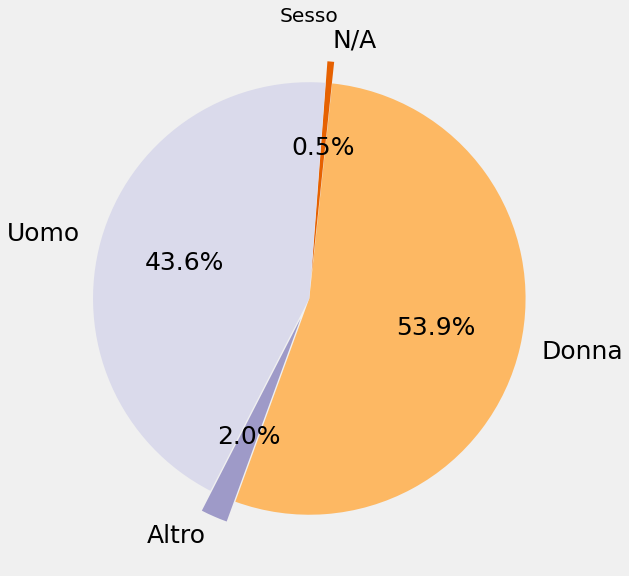

In [3]:
sesso = sondaggio["Sono"].value_counts()
sex = np.array([sesso["Donna"],sesso["Preferisco non dirlo"],sesso["Uomo"],sesso["Altro"]])
sexlabels = ["Donna", "N/A", "Uomo","Altro"]
sexcolors = ['#fdb863','#e66101','#dadaeb','#9e9ac8']
myexplode= [0, 0.1, 0, 0.1]
torta(sex,sexlabels,sexcolors,"Sesso","sex.png",myexplode)

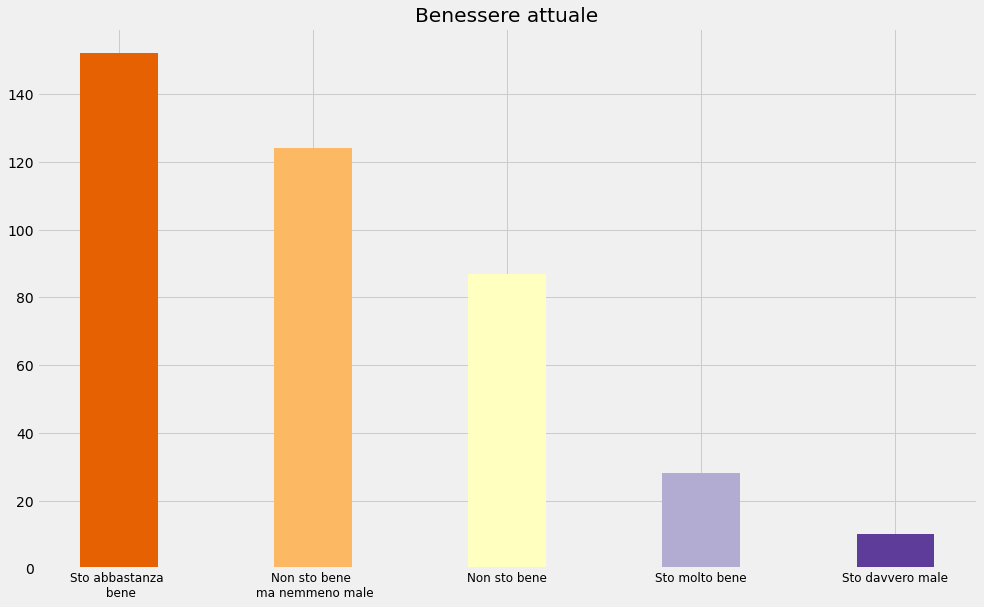

In [4]:
ora = sondaggio["Pensando in generale alla mia vita e a come mi sento mentalmente, direi che"].value_counts()
now_y = ora.values
ora = ora.rename(index = {'Non sto bene ma nemmeno male':'Non sto bene \n ma nemmeno male','Sto abbastanza bene':'Sto abbastanza \n bene'})
now_x = ora.index

nowcolors = ["#e66101", "#fdb863", "#ffffbf", "#b2abd2", "#5e3c99"]
barre(now_x,now_y,nowcolors,"Benessere attuale","now.png")

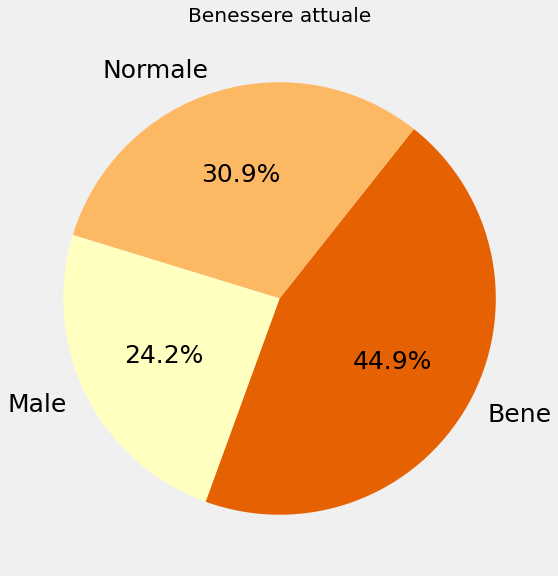

In [5]:
ora = sondaggio["Pensando in generale alla mia vita e a come mi sento mentalmente, direi che"].value_counts()
now = np.array([ora["Sto abbastanza bene"] + ora["Sto molto bene"],ora["Non sto bene ma nemmeno male"],ora["Non sto bene"] + ora["Sto davvero male"]])
nowlabels = ["Bene", "Normale", "Male"]
nowcolors = ["#e66101", "#fdb863", "#ffffbf"]               
torta(now,nowlabels,nowcolors,"Benessere attuale","now_perc.png")

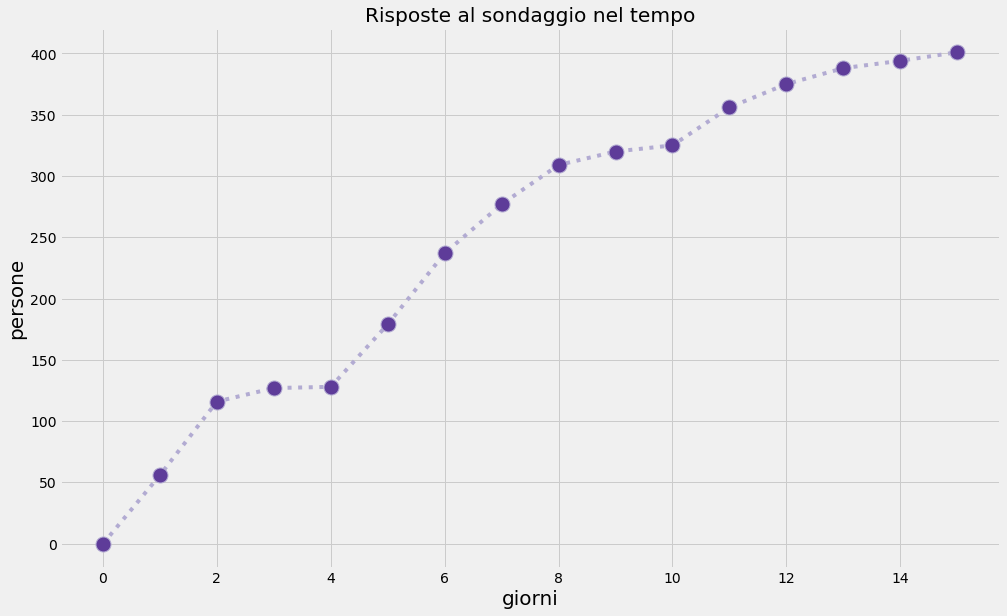

In [6]:
stripped = [s.split(" ",1)[0] for s in sondaggio["Informazioni cronologiche"].values]
data = pd.Series([0]).append(pd.Series(stripped).value_counts().sort_index())
x = np.arange(0,len(data))
y = np.cumsum(data.values)

plt.plot(x, y, marker='o' , mfc='#5e3c99', ms=15, linestyle = 'dotted', color='#b2abd2' )
plt.xlabel("giorni", size='20')
plt.ylabel("persone", size='20')
plt.title("Risposte al sondaggio nel tempo")
plt.savefig('andamento.png')

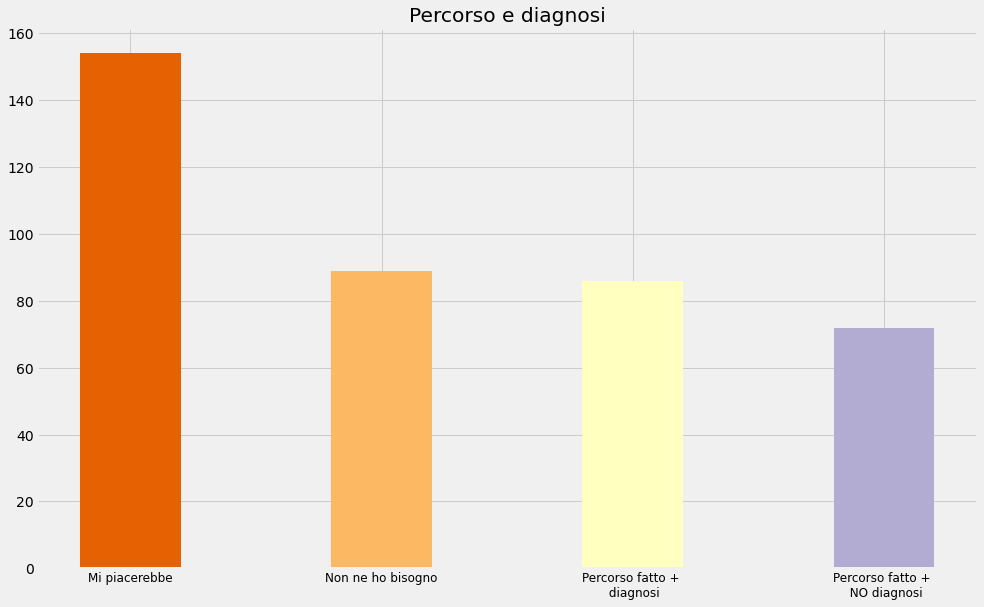

In [7]:
diag = sondaggio["Diagnosi"].value_counts()
diag_y = diag.values
diag = diag.rename(index= {'Non ho intrapreso nessun percorso ma mi piacerebbe farlo':"Mi piacerebbe",\
                          'Non ho intrapreso nessun percorso perché credo di non averne bisogno':"Non ne ho bisogno",\
                           'Ho intrapreso un percorso e ho ricevuto delle diagnosi':  "Percorso fatto + \n diagnosi",\
                          'Ho intrapreso un percorso ma NON ho ricevuto diagnosi':"Percorso fatto + \n  NO diagnosi "})
diag_x = diag.index
mycolors = ["#e66101", "#fdb863", "#ffffbf", "#b2abd2"]
barre(diag_x,diag_y,mycolors,"Percorso e diagnosi","diag_bars.png")

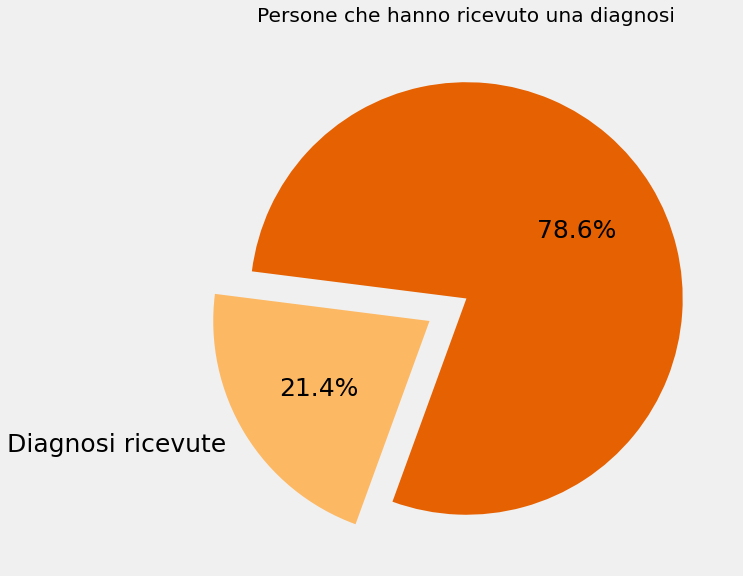

In [8]:
diag = sondaggio["Diagnosi"].value_counts()

diagnosi = np.array([sum(diag)-diag["Ho intrapreso un percorso e ho ricevuto delle diagnosi"], diag["Ho intrapreso un percorso e ho ricevuto delle diagnosi"]])
mylabels= ["", "Diagnosi ricevute"]
mycolors = ["#e66101", "#fdb863"]
myexplode = [0, 0.2]
torta(diagnosi,mylabels,mycolors,"Persone che hanno ricevuto una diagnosi","diag_perc.png",myexplode)


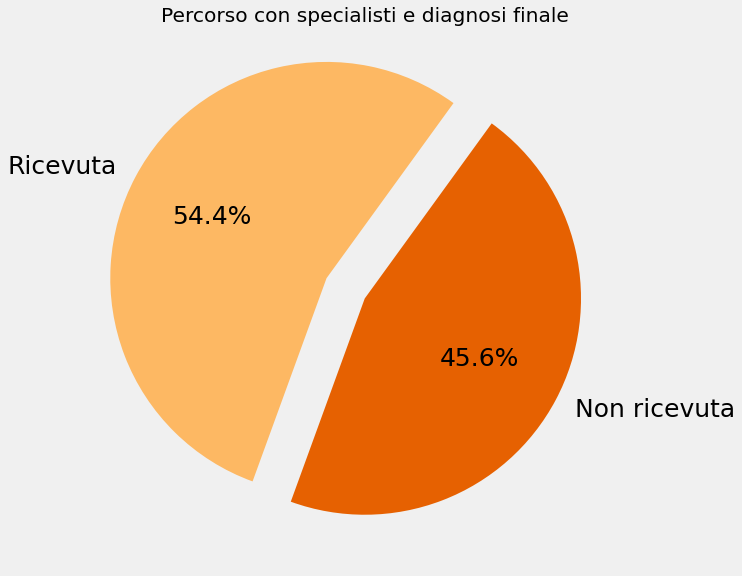

In [9]:
diag = sondaggio["Diagnosi"].value_counts()

diagnosi = np.array([diag["Ho intrapreso un percorso ma NON ho ricevuto diagnosi"], diag["Ho intrapreso un percorso e ho ricevuto delle diagnosi"]])
mylabels= ["Non ricevuta", "Ricevuta"]
mycolors = ["#e66101", "#fdb863"]

myexplode = [0, 0.2]
torta(diagnosi,mylabels,mycolors,"Percorso con specialisti e diagnosi finale","diag_perc.png",myexplode)


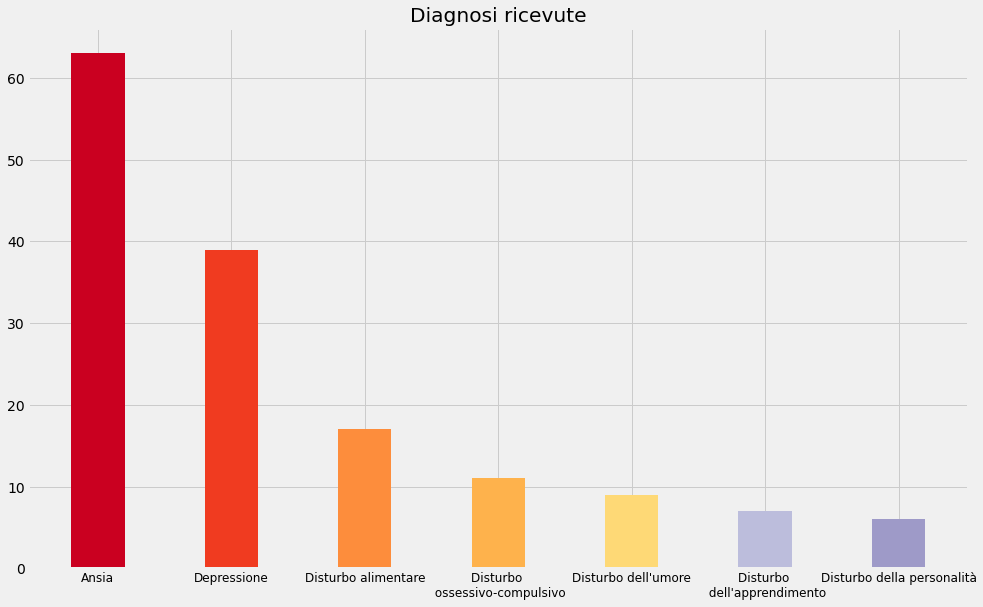

In [10]:
sbagliato = sondaggio[(sondaggio["Diagnosi"]!="Ho intrapreso un percorso e ho ricevuto delle diagnosi")&(sondaggio["Ho ricevuto diagnosi legate a "].notna())]
s1 = sondaggio.drop(sbagliato["Ho ricevuto diagnosi legate a "].index.tolist())

diag = s1["Ho ricevuto diagnosi legate a "].str.get_dummies(sep=', ')
diag_s = diag.sum().sort_values(ascending=False)
diag_s = diag_s.rename(index={"Disturbo ossessivo-compulsivo":"Disturbo \n ossessivo-compulsivo",\
                             "Disturbo dell'apprendimento":"Disturbo \n dell'apprendimento"})
diag_y = diag_s.values[diag_s.values>1]
diag_x = diag_s.index[diag_s.values>1]
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#bcbddc','#9e9ac8']
plt.bar(diag_x,diag_y, color=mycolors, width = 0.4)
plt.xticks(fontsize=12)
plt.title("Diagnosi ricevute")

plt.savefig('diag_bars2.png')
barre(diag_x,diag_y,mycolors,"Diagnosi ricevute","diag_bars2.png")

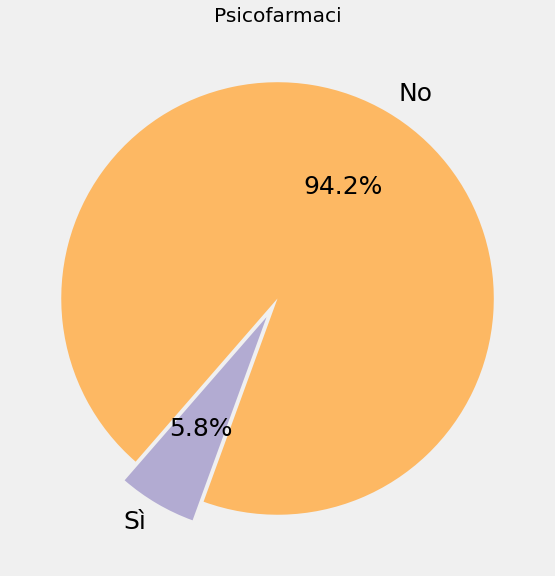

In [11]:
farm = sondaggio["Prendo degli psicofarmaci"].value_counts()
farmaci = np.array([farm["No"], farm["Sì"]])
mylabels= ["No", "Sì"]
mycolors = ["#fdb863", "#b2abd2"]

myexplode = [0, 0.1]
torta(farmaci,mylabels,mycolors,"Psicofarmaci","farmaci.png",myexplode)

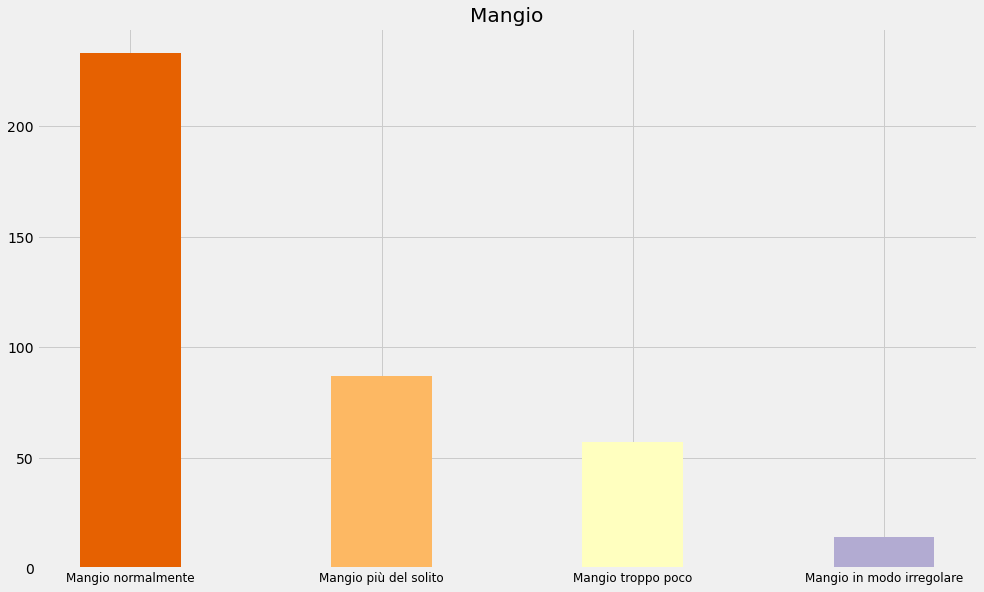

In [12]:
mangio = sondaggio["Nell'ultimo periodo mangio"].str.get_dummies(sep=', ')
mangio_s = mangio.sum()
mangio_s["Mangio in modo irregolare"]+=12  #manualmente risposta aperta
mangio_s["Mangio troppo poco"]+=mangio_s["Mangio meno del solito"]
mangio_s=mangio_s.drop("Mangio meno del solito") #già conteggiate con mangio troppo poco
mangio_s = mangio_s.sort_values(ascending=False)
diag_y = mangio_s.values[mangio_s.values>5]
diag_x = mangio_s.index[mangio_s.values>5]
mycolors = ["#e66101", "#fdb863", "#ffffbf", "#b2abd2"]
barre(diag_x,diag_y,mycolors,"Mangio","mangio.png")

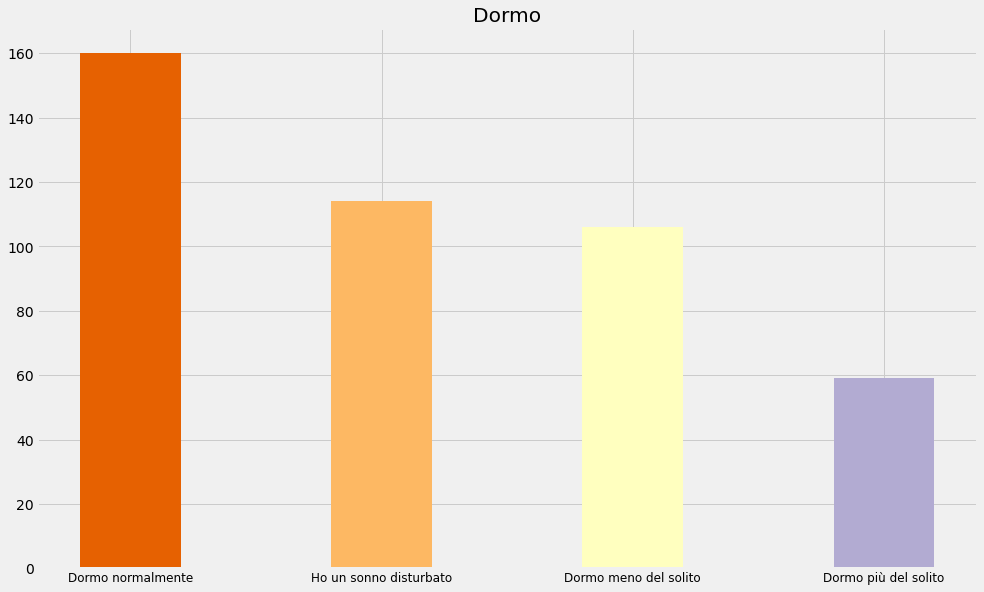

In [13]:
dormo = sondaggio["Nell'ultimo periodo dormo"].str.get_dummies(sep=', ')
dormo_s = dormo.sum().sort_values(ascending=False)
diag_y = dormo_s.values[dormo_s.values>10]
diag_x = dormo_s.index[dormo_s.values>10]
mycolors = ["#e66101", "#fdb863", "#ffffbf", "#b2abd2", "#5e3c99"]
barre(diag_x,diag_y,mycolors,"Dormo","Dormo.png")

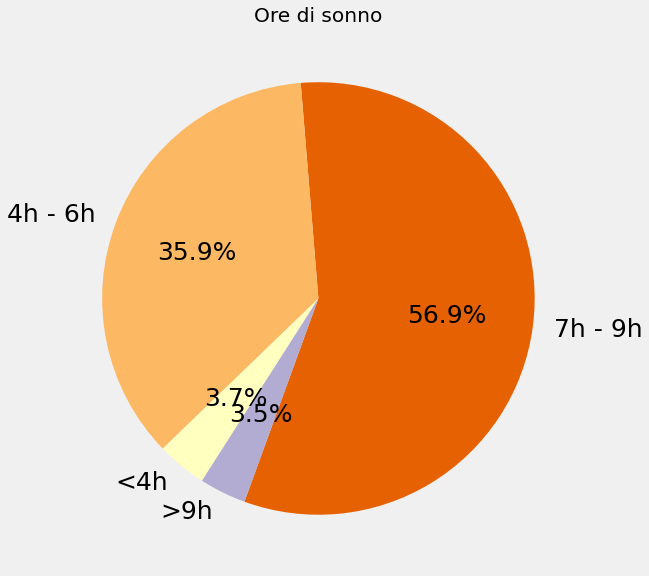

In [14]:
d = sondaggio["Dormo"].value_counts()
d = d.rename(index={"Dalle 7h alle 9h": "7h - 9h",\
    "Dalle 4h alle 6h":"4h - 6h",\
    "Meno di 4h per notte":"<4h",\
    "Più di 9h a notte":">9h"})
dormo = d.values
mylabels= d.index
mycolors = ["#e66101", "#fdb863", "#ffffbf", "#b2abd2"]
torta(dormo,mylabels,mycolors,"Ore di sonno","ore.png")

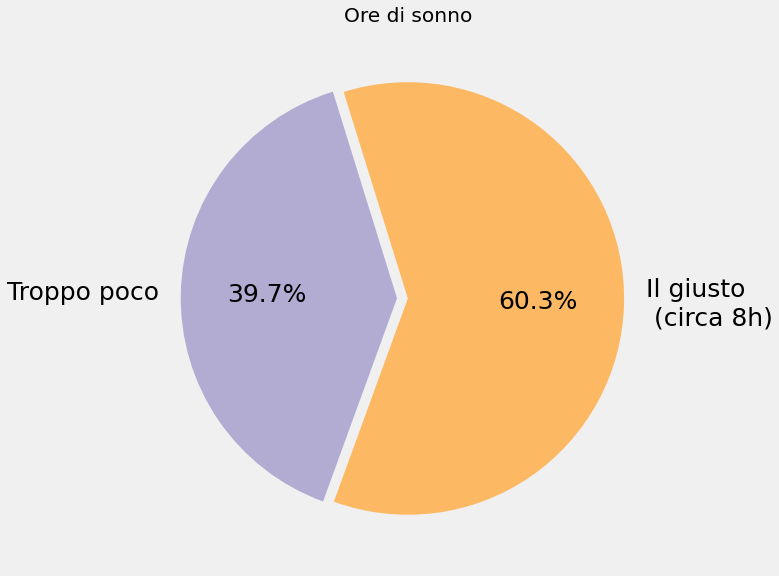

In [15]:
d = sondaggio["Dormo"].value_counts()
dormo = np.array([d["Dalle 7h alle 9h"] + d["Più di 9h a notte"], d["Dalle 4h alle 6h"] + d["Meno di 4h per notte"]])
mylabels= ["Il giusto\n (circa 8h)", "Troppo poco"]
mycolors = ["#fdb863", "#b2abd2"]
myexplode = [0, 0.05]
torta(dormo,mylabels,mycolors,"Ore di sonno","ore2.png",myexplode)

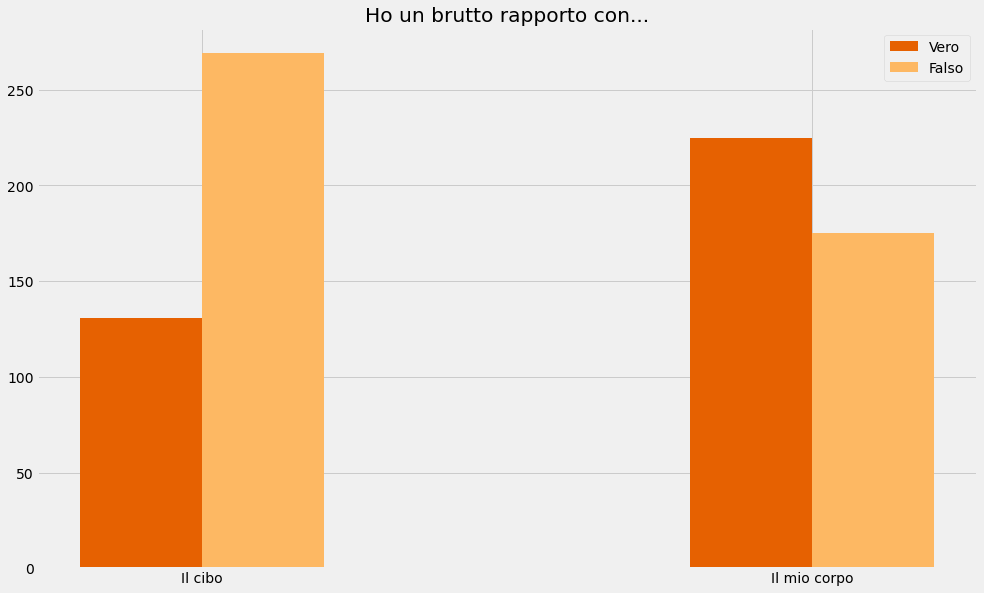

In [16]:
ci=sondaggio["Nella mia vita  [Ho/Ho avuto un brutto rapporto con il cibo]"].value_counts()

co=sondaggio["Nella mia vita  [Ho/ho avuto un brutto rapporto con il mio corpo]"].value_counts()

valori = ['Il cibo','Il mio corpo']
ve = [ci["Vero"], co["Vero"]]
fa = [ci["Falso"], co["Falso"]]
vero_falso(ve,fa,valori,"Ho un brutto rapporto con...","cibo_corpo.png")

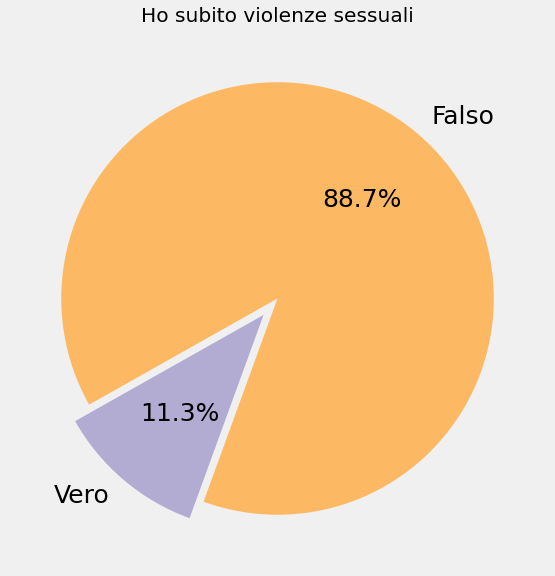

In [17]:
s=sondaggio["Nella mia vita  [Ho subito/subisco molestie sessuali]"].value_counts()
vs = np.array([s["Falso"], s["Vero"]])
mylabels= ["Falso", "Vero"]
mycolors = ["#fdb863", "#b2abd2"]
myexplode=[0, 0.1]
torta(vs,mylabels,mycolors,"Ho subito violenze sessuali","vs_pie.png",myexplode)

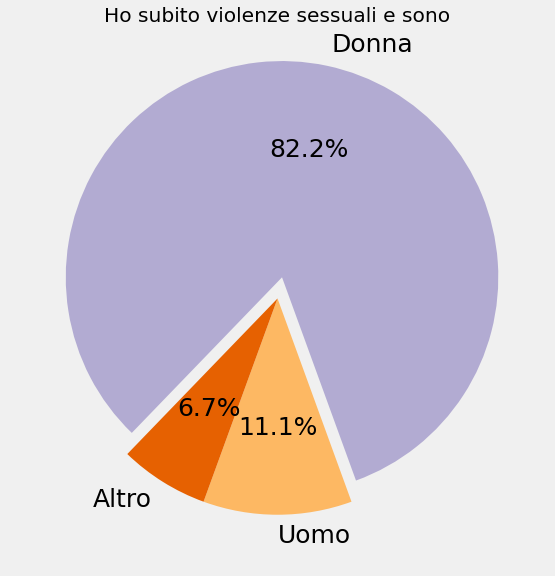

In [18]:
m= sondaggio[(sondaggio["Nella mia vita  [Ho subito/subisco molestie sessuali]"]=="Vero")&(sondaggio["Sono"]=="Uomo")]

f=sondaggio[(sondaggio["Nella mia vita  [Ho subito/subisco molestie sessuali]"]=="Vero")&(sondaggio["Sono"]=="Donna")]

a=sondaggio[(sondaggio["Nella mia vita  [Ho subito/subisco molestie sessuali]"]=="Vero")&(sondaggio["Sono"]=="Altro")]

vs_s = np.array([len(m), len(f), len(a)])
mylabels= ["Uomo", "Donna", "Altro"]
mycolors = ["#fdb863", "#b2abd2", "#e66101"]
myexplode=[0, 0.1, 0]
torta(vs_s,mylabels,mycolors,"Ho subito violenze sessuali e sono","vs_s_pie.png",myexplode)

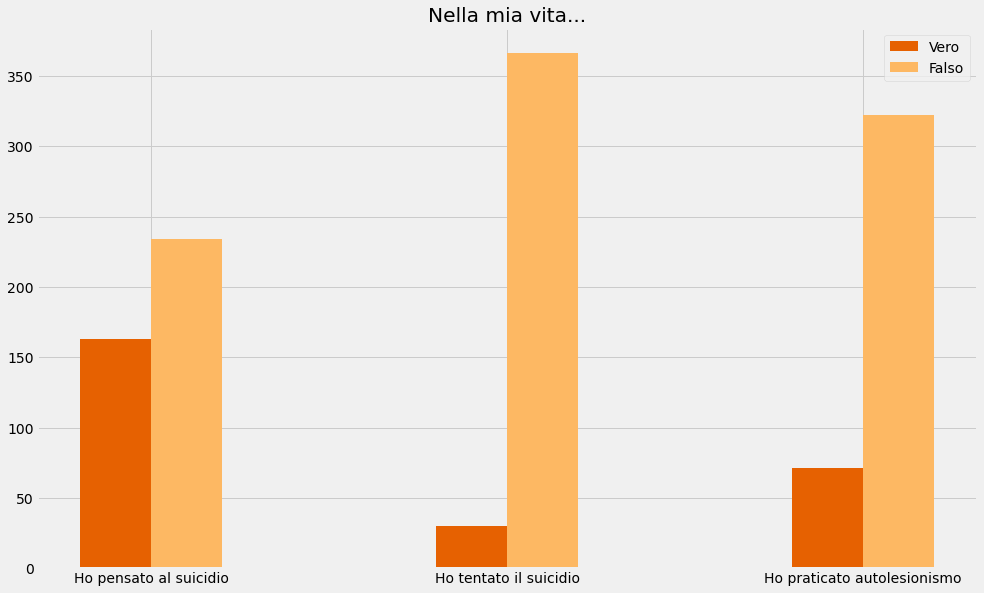

In [19]:
p_s=sondaggio["Nella mia vita  [Ho pensato/penso al suicidio]"].value_counts()

t_s=sondaggio["Nella mia vita  [Ho tentato il suicidio]"].value_counts()

a= sondaggio["Nella mia vita  [Pratico/Ho praticato autolesionismo]"].value_counts()

valori = ['Ho pensato al suicidio','Ho tentato il suicidio', 'Ho praticato autolesionismo']

ve=[p_s["Vero"], t_s["Vero"], a["Vero"]]
fa=[p_s["Falso"], t_s["Falso"], a["Falso"]]

vero_falso(ve,fa,valori,"Nella mia vita...","info.png")
plt.savefig('info.png')

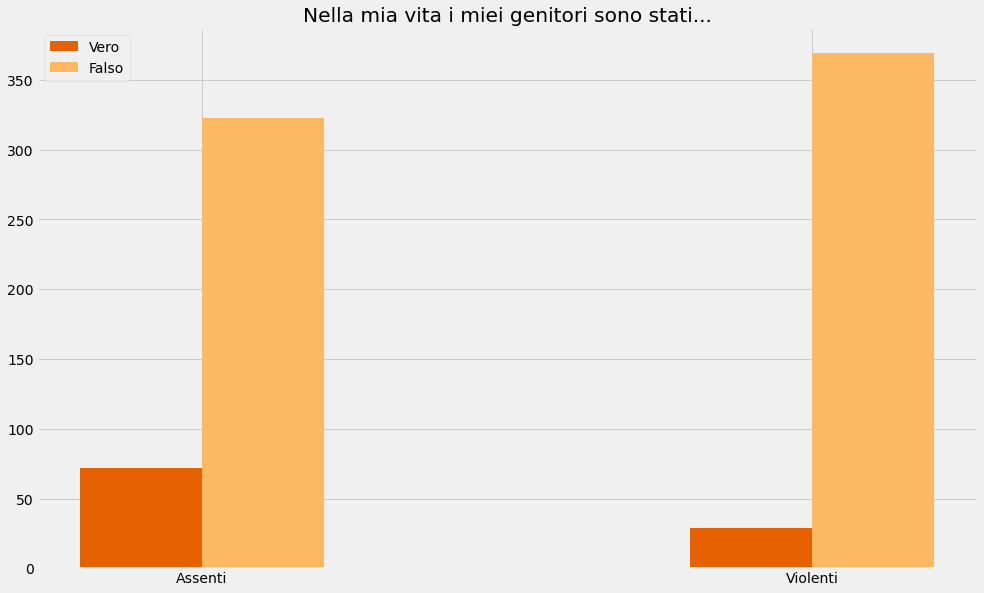

In [20]:
ass=sondaggio["Nella mia vita  [Da piccolo/a i miei genitori sono stati assenti]"].value_counts()

vio=sondaggio["Nella mia vita  [Da piccolo/a i miei genitori sono stati violenti]"].value_counts()

valori = ['Assenti','Violenti']

ve=[ass["Vero"], vio["Vero"]]
fa=[ass["Falso"], vio["Falso"]]
vero_falso(ve,fa,valori,"Nella mia vita i miei genitori sono stati...","genitori.png")


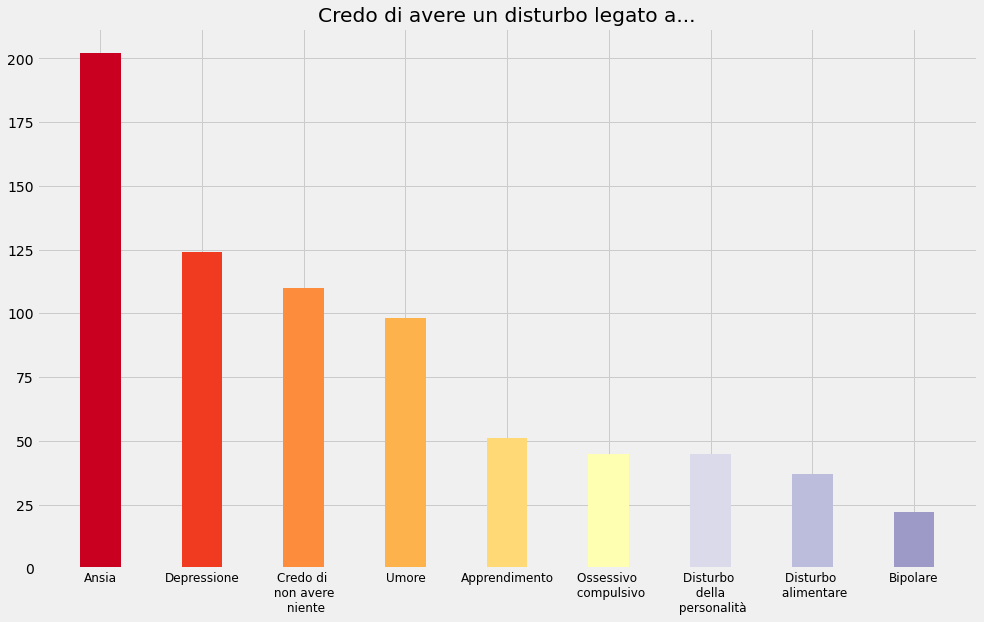

In [21]:
c = sondaggio["Credo di"].str.get_dummies(sep=', ')
dist = c.sum().sort_values(ascending=False)

dist = dist.rename(index={"Avere un disturbo legato all'ansia":"Ansia",\
                   'Avere un disturbo legato alla depressione':"Depressione",\
                  "Credo di non avere niente": "Credo di \n non avere \n niente",\
                  "Avere un disturbo legato all'umore":"Umore",\
                  "Avere un disturbo legato all'apprendimento":"Apprendimento",\
                  "Avere un disturbo ossessivo-compulsivo":"Ossessivo \n compulsivo",\
                  "Avere un disturbo della personalità":"Disturbo \n della \n personalità",\
                  "Avere un disturbo alimentare":"Disturbo \n alimentare",\
                    "Essere bipolare":"Bipolare"})
diag_y = dist.values[dist.values>10]
diag_x = dist.index[dist.values>10]

mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#dadaeb','#bcbddc','#9e9ac8']
barre(diag_x,diag_y,mycolors,"Credo di avere un disturbo legato a...","credo.png")

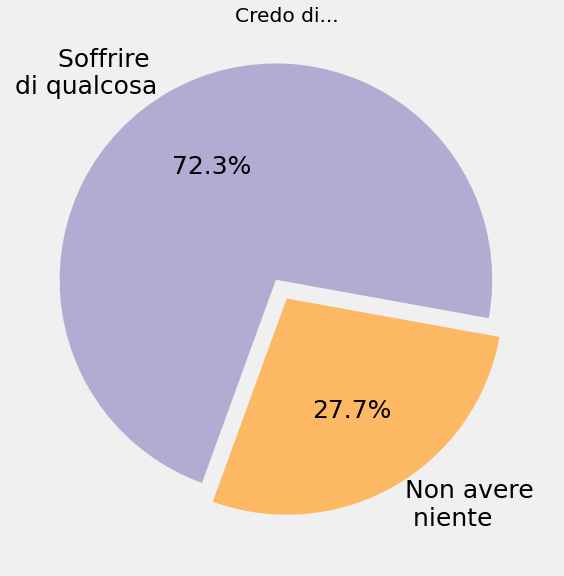

In [22]:
c = sondaggio["Credo di"].str.get_dummies(sep=', ')
ni=sum(c["Credo di non avere niente"])

myexplode= [0, 0.1]
count_sb=0
for i in range(len(c)): #risposta multipla "credo di non aver niente" + avere qualcosa
    if (c["Credo di non avere niente"][i])&(sum(c.iloc[i])>1):
        count_sb+=1
        
credo= np.array([ni, len(c)-ni-count_sb])
mylabels = ["Non avere \n niente", "Soffrire \n di qualcosa"]
mycolors = ["#fdb863", "#b2abd2"]
torta(credo,mylabels,mycolors,"Credo di...","niente.png",myexplode)

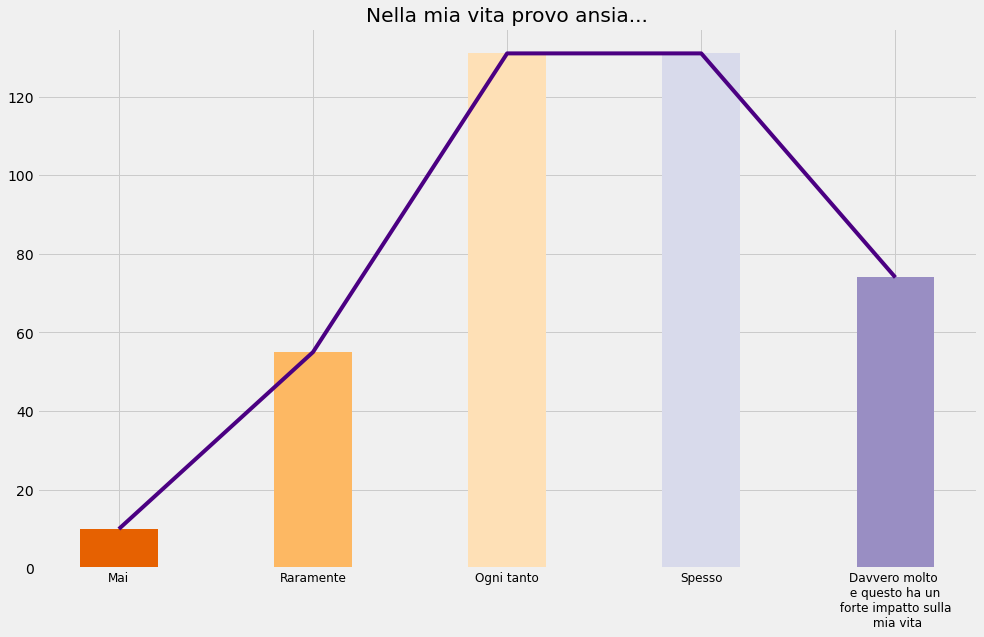

In [23]:
a = sondaggio["Ansia [Nella mia vita provo ansia]"]. value_counts()
a = a.rename(index={"Davvero molto e questo ha un forte impatto sulla mia vita" :"Davvero molto \n e questo ha un \n forte impatto sulla \n mia vita"})
a =  a.reindex(index=["Mai","Raramente","Ogni tanto","Spesso","Davvero molto \n e questo ha un \n forte impatto sulla \n mia vita"])
diag_y = a.values
diag_x =a.index
mycolors = ['#e66101','#fdb863','#fee0b6','#d8daeb','#998ec3','#542788']
barre(diag_x,diag_y,mycolors,"Nella mia vita provo ansia...","Ansia_provo.png")
a.plot(color='#4B0082')
plt.savefig("Ansia_provo.png")

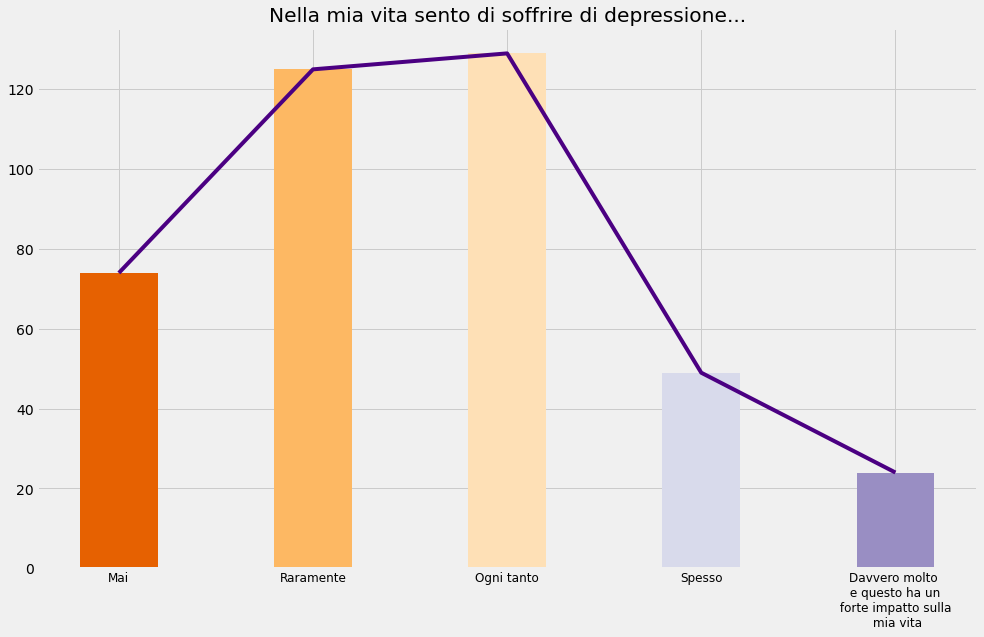

In [24]:
d = sondaggio["Depressione [Nella mia vita mi sento di soffrire di depressione]"].value_counts()
d = d.rename(index={"Davvero molto e questo ha un forte impatto sulla mia vita" :"Davvero molto \n e questo ha un \n forte impatto sulla \n mia vita"})
d =  d.reindex(index=["Mai","Raramente","Ogni tanto","Spesso","Davvero molto \n e questo ha un \n forte impatto sulla \n mia vita"])
diag_y = d.values
diag_x =d.index
mycolors = ['#e66101','#fdb863','#fee0b6','#d8daeb','#998ec3','#542788']
barre(diag_x,diag_y,mycolors,"Nella mia vita sento di soffrire di depressione...","Depressione_provo.png")
d.plot(color='#4B0082')
plt.savefig("Depressione_provo.png")

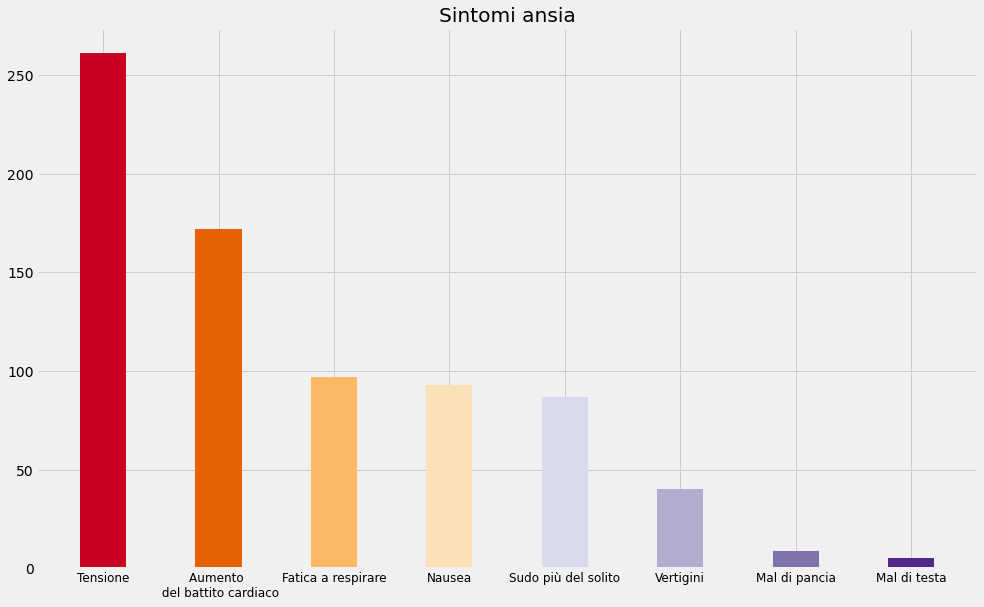

In [25]:
sintomi_a = sondaggio["Se soffri d’ansia che cosa provi?"].str.get_dummies(sep=', ')
sint_a = sintomi_a.sum()
a_mano_s = pd.Series(data={'Mal di testa':5, 'Mal di pancia': 9}) #manualmente a 410 (risposta aperta)
sint_a = sint_a.append(a_mano_s).sort_values(ascending=False)
sint_a = sint_a.rename(index={"Aumento del battito cardiaco":"Aumento \n del battito cardiaco"})
diag_y = sint_a.values[sint_a.values>2]
diag_x = sint_a.index[sint_a.values>2]
mycolors = ["#ca0020", '#e66101','#fdb863','#fee0b6','#d8daeb','#b2abd2','#8073ac','#542788']
barre(diag_x,diag_y,mycolors,"Sintomi ansia","ansia.png")


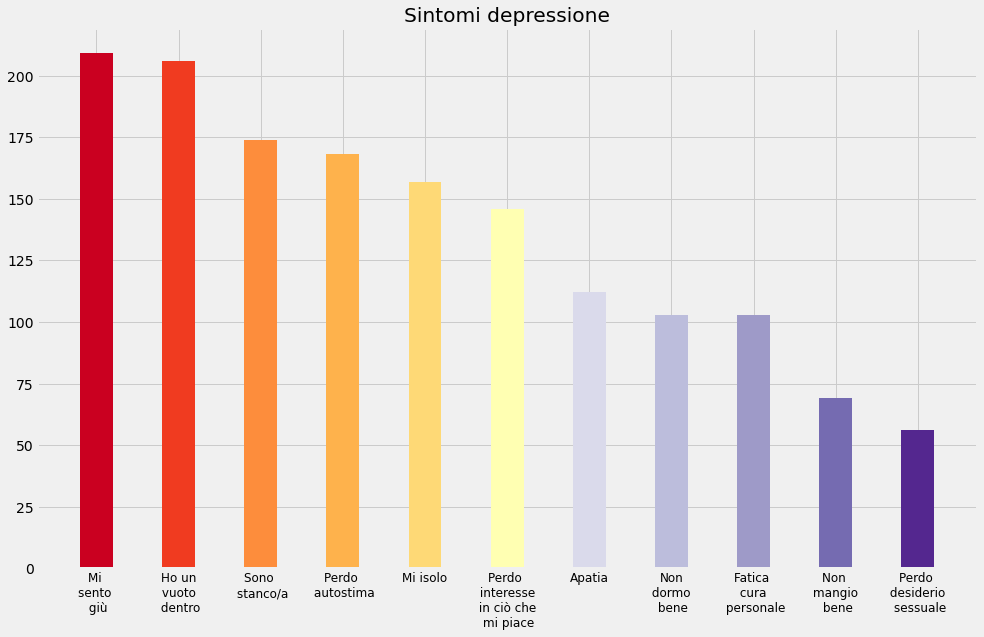

In [26]:
sintomi_d = sondaggio["Se soffri di depressione, cosa provi?"].str.get_dummies(sep=', ')
sint_d = sintomi_d.sum().sort_values(ascending=False)
sint_d = sint_d.drop(labels='lavare i denti,…)') #errore di lettura
diag_y = sint_d.values[sint_d.values > 20]
sint_d = sint_d.rename(index={'Mi sento giù':"Mi \nsento \n giù",\
                          'Mi sento un vuoto dentro':"Ho un\n vuoto \n dentro",\
                         'Mi sento stanco/a': "Sono \n stanco/a",\
                         'Perdo autostima':"Perdo \n autostima",\
                          'Le cose che mi interessano perdono di significato':"Perdo \n interesse \n in ciò che \n mi piace",\
                          'Faccio fatica a provare emozioni':"Apatia",\
                         'Non dormo bene':"Non\n dormo \n bene",\
                         'Faccio fatica a prendermi cura di me (fare la doccia':"Fatica \n cura \n personale",\
                         'Non riesco a mangiare bene':"Non \n mangio \n bene",\
                         'Perdo il desiderio sessuale': "Perdo \n desiderio \n sessuale"})

diag_x = sint_d.index[sint_d.values > 20]
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
barre(diag_x,diag_y,mycolors,"Sintomi depressione","depressione_sintomi.png")

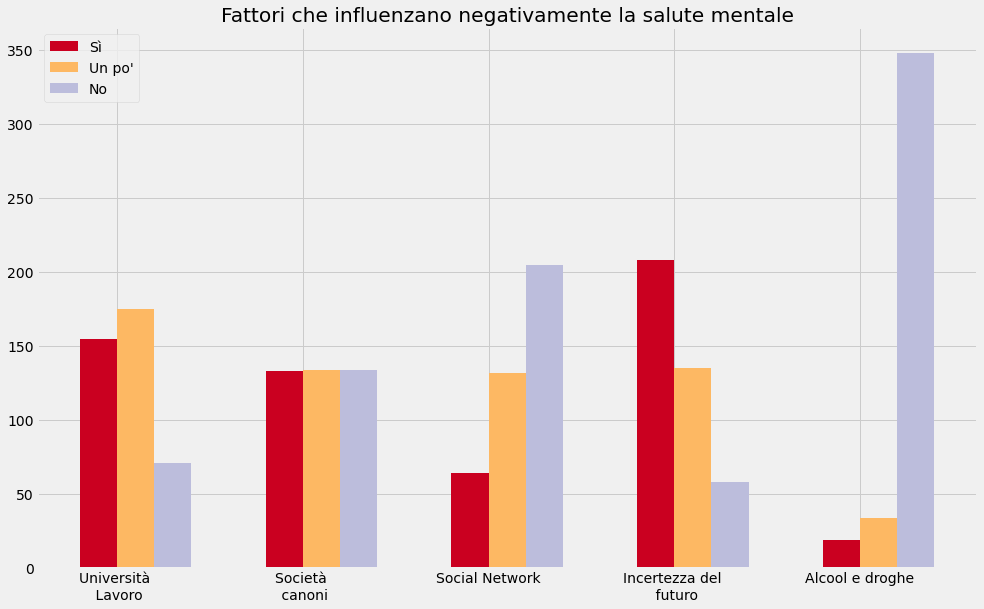

In [27]:
neg_uni = sondaggio["Questi fattori influenzano la tua salute mentale IN NEGATIVO? [L'Università - Il lavoro]"].value_counts()
neg_est= sondaggio["Questi fattori influenzano la tua salute mentale IN NEGATIVO? [La società e i canoni estetici]"].value_counts()
neg_soc= sondaggio["Questi fattori influenzano la tua salute mentale IN NEGATIVO? [I social network]"].value_counts()
neg_inc = sondaggio["Questi fattori influenzano la tua salute mentale IN NEGATIVO? [L'incertezza del futuro]"].value_counts()
neg_alc = sondaggio["Questi fattori influenzano la tua salute mentale IN NEGATIVO? [Alcol/Droghe]"].value_counts()

valori= ["Università \n Lavoro","Società \n canoni","Social Network","Incertezza del \n futuro","Alcool e droghe"]
si=[neg_uni["Sì"],neg_est["Sì"],neg_soc["Sì"],neg_inc["Sì"],neg_alc["Sì"]]
no=[neg_uni["No"],neg_est["No"],neg_soc["No"],neg_inc["No"],neg_alc["No"]]
po=[neg_uni["Un po'"],neg_est["Un po'"],neg_soc["Un po'"],neg_inc["Un po'"],neg_alc["Un po'"]]
si_no_po(si,no,po,valori,"Fattori che influenzano negativamente la salute mentale","fact_neg.png")

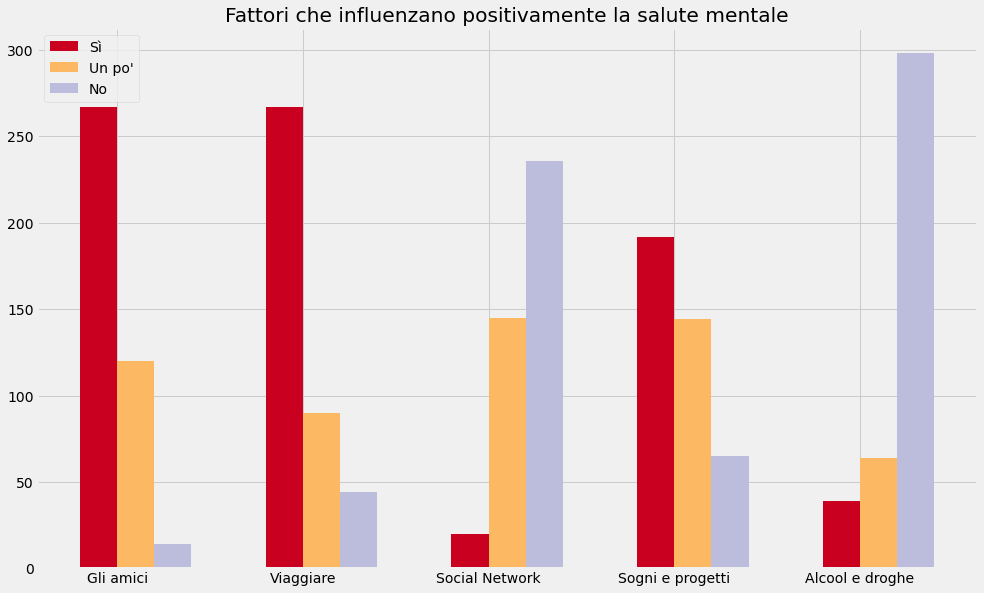

In [28]:
pos_ami = sondaggio["Questi fattori influenzano la tua salute mentale IN POSITIVO? [Gli amici]"].value_counts()
pos_via= sondaggio["Questi fattori influenzano la tua salute mentale IN POSITIVO? [Viaggiare]"].value_counts()
pos_soc= sondaggio["Questi fattori influenzano la tua salute mentale IN POSITIVO? [I social network]"].value_counts()
pos_sogn = sondaggio["Questi fattori influenzano la tua salute mentale IN POSITIVO? [I miei sogni e progetti]"].value_counts()
pos_alc = sondaggio["Questi fattori influenzano la tua salute mentale IN POSITIVO? [Alcol/Droghe]"].value_counts()
valori= ["Gli amici","Viaggiare","Social Network","Sogni e progetti","Alcool e droghe"]
si=[pos_ami["Sì"],pos_via["Sì"],pos_soc["Sì"],pos_sogn["Sì"],pos_alc["Sì"]]
no=[pos_ami["No"],pos_via["No"],pos_soc["No"],pos_sogn["No"],pos_alc["No"]]
po=[pos_ami["Un po'"],pos_via["Un po'"],pos_soc["Un po'"],pos_sogn["Un po'"],pos_alc["Un po'"]]
si_no_po(si,no,po,valori,"Fattori che influenzano positivamente la salute mentale","fact_pos.png")

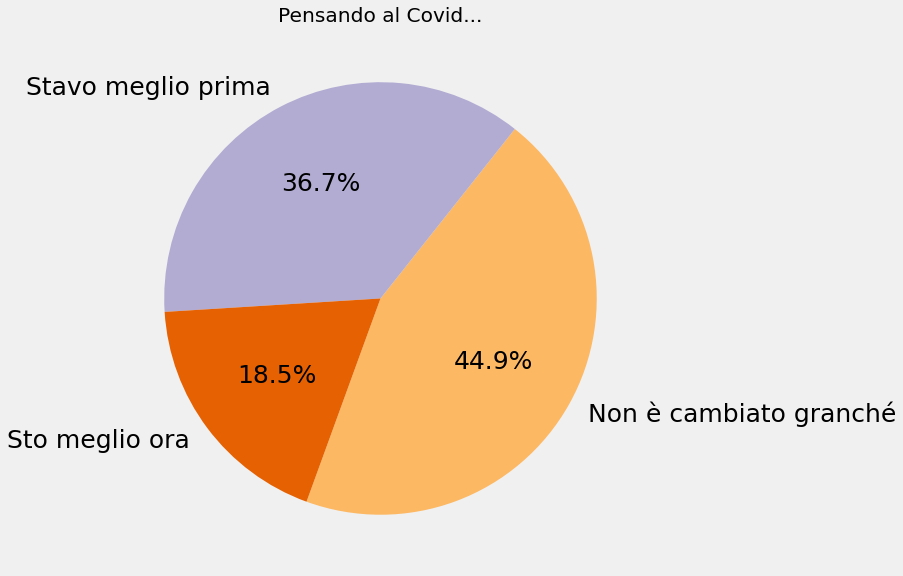

In [29]:
covid = sondaggio["Paragona il tuo benessere mentale oggi e prima della pandemia"].value_counts()
mycolors = ["#fdb863", "#b2abd2", "#e66101"]
torta(covid.values,covid.index,mycolors,"Pensando al Covid...","covid.png")

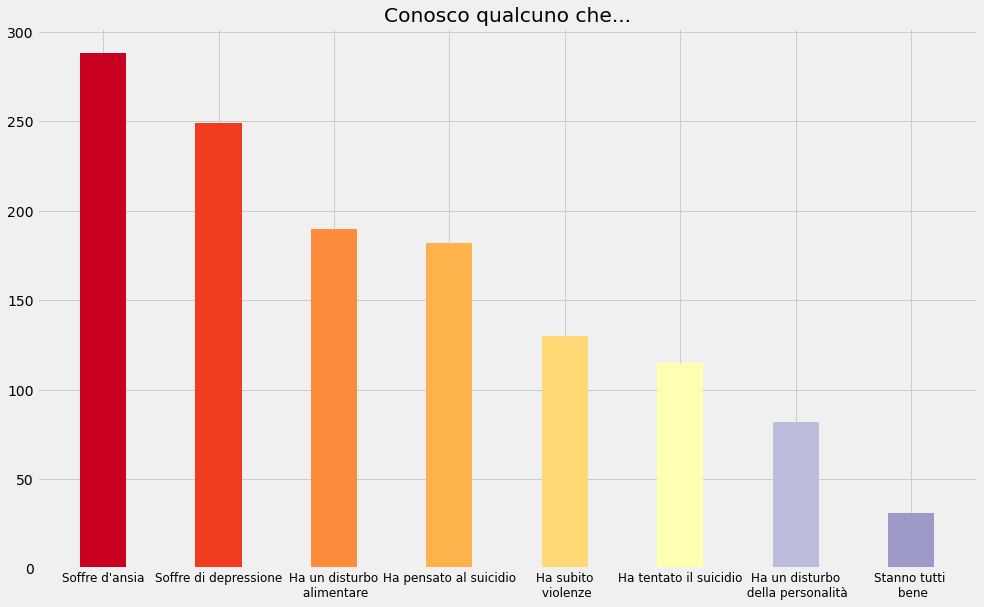

In [30]:
conosco = sondaggio["Conosco personalmente qualcuno che"].str.get_dummies(sep=', ')
count_sb=0
for i in range(len(c)): #risposta multipla "credo di non aver niente" + avere qualcosa
    if (conosco["Tutte le persone che conosco stanno bene"][i])&(sum(conosco.iloc[i])>1):
        count_sb+=1
con_s = conosco.sum()
con_s['Tutte le persone che conosco stanno bene']=con_s['Tutte le persone che conosco stanno bene'] -count_sb
con_s = con_s.sort_values(ascending=False)
diag_y = con_s.values[con_s.values>1]
con_s = con_s.rename(index={"Ha un disturbo alimentare":'Ha un disturbo\n alimentare',\
                           'Ha subito/subisce violenze verbali-fisiche-sessuali':'Ha subito\n violenze',\
                            'Ha un disturbo della personalità': 'Ha un disturbo\n della personalità',\
                           'Tutte le persone che conosco stanno bene':"Stanno tutti \n bene"})
diag_x = con_s.index[con_s.values>1]
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#bcbddc','#9e9ac8','#756bb1','#54278f']
barre(diag_x,diag_y,mycolors,"Conosco qualcuno che...","conosco.png")


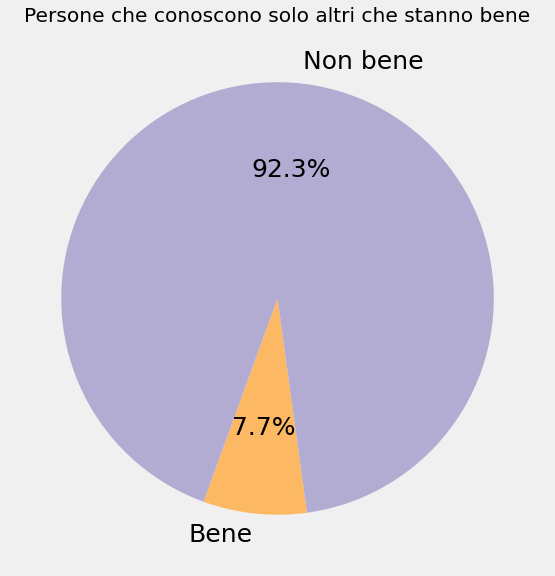

In [31]:
num_nbene = conosco['Tutte le persone che conosco stanno bene'].sum()
tot = len(conosco)
bene = [num_nbene-count_sb,tot-num_nbene+count_sb]
mycolors = ["#fdb863", "#b2abd2"]
torta(bene,["Bene","Non bene"],mycolors,"Persone che conoscono solo altri che stanno bene","con_bene.png")

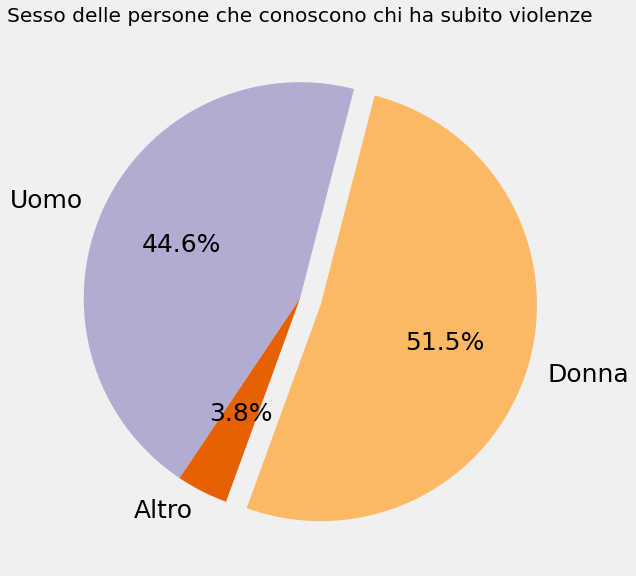

In [32]:
molestie_s = sondaggio[conosco['Ha subito/subisce violenze verbali-fisiche-sessuali']==1]
molestie = molestie_s["Sono"].value_counts()
mycolors = ["#fdb863", "#b2abd2", "#e66101"]
myexplode = [0.1,0,0]
torta(molestie.values,molestie.index,mycolors,"Sesso delle persone che conoscono chi ha subito violenze","sesso_viol.png",myexplode)

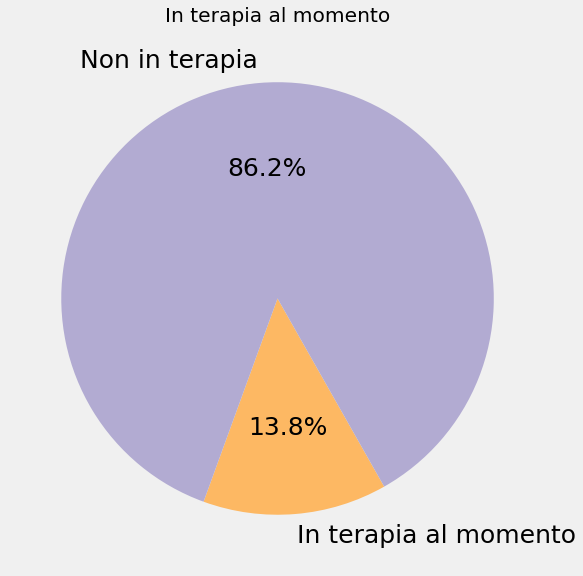

In [33]:
t = sondaggio["In merito a percorsi con specialisti"].str.get_dummies(sep=', ')
ter = t["Sono in terapia al momento"].sum()
tot=len(t)
torta([ter,tot],["In terapia al momento","Non in terapia"],mycolors,"In terapia al momento","terapia_mom.png")


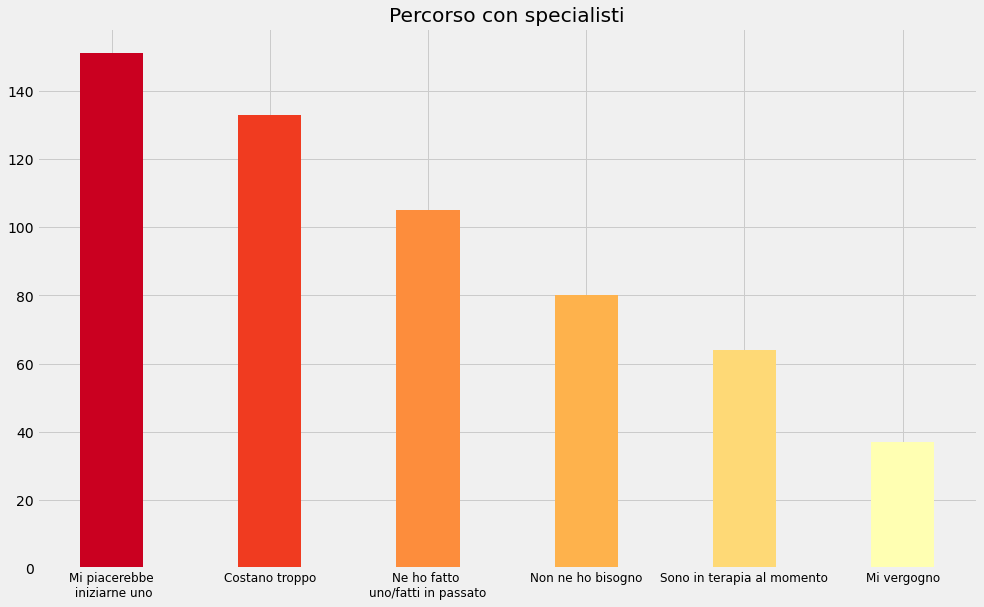

In [34]:
specialisti = sondaggio["In merito a percorsi con specialisti"].str.get_dummies(sep=', ')
spec = specialisti.sum().sort_values(ascending=False)
spec = spec.rename(index={'Mi piacerebbe iniziarne uno':'Mi piacerebbe\n iniziarne uno', \
                          'Ne ho fatto uno/fatti in passato':'Ne ho fatto \nuno/fatti in passato'})
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#dadaeb','#bcbddc']
barre(spec.index[spec.values>1],spec.values[spec.values>1],mycolors,"Percorso con specialisti","specialisti.png")

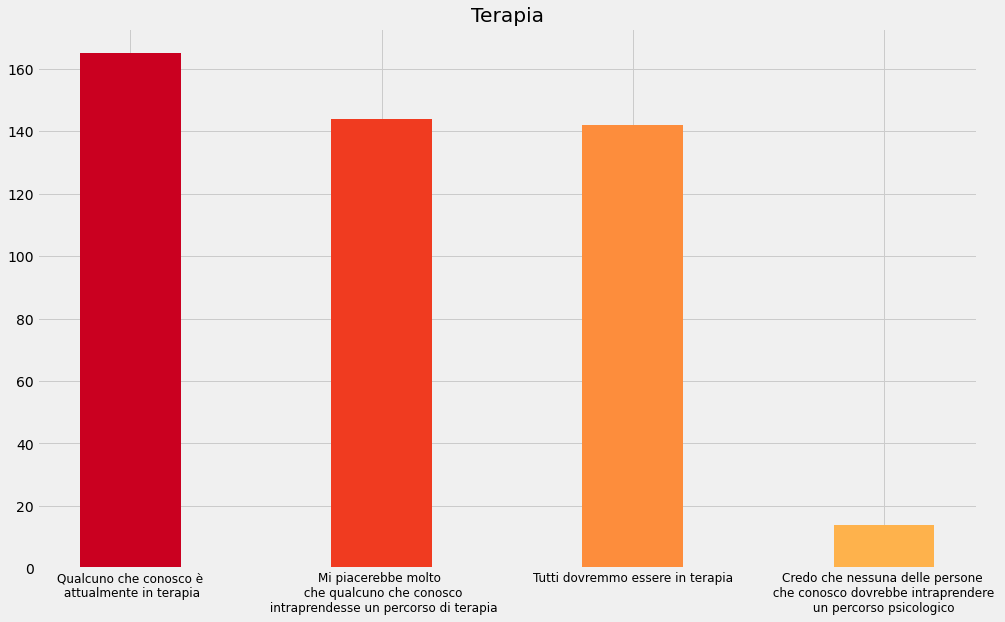

In [35]:
terapia= sondaggio["Terapia"].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
terapia = terapia.rename(index={"Qualcuno che conosco è attualmente in terapia":"Qualcuno che conosco è\n attualmente in terapia",\
                                "Mi piacerebbe molto che qualcuno che conosco intraprendesse un percorso di terapia":"Mi piacerebbe molto \n che qualcuno che conosco\n intraprendesse un percorso di terapia",\
                                "Credo che nessuna delle persone che conosco dovrebbe intraprendere un percorso psicologico":"Credo che nessuna delle persone \n che conosco dovrebbe intraprendere \n un percorso psicologico "})
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c']
barre(terapia.index,terapia.values,mycolors,"Terapia","terapia.png")

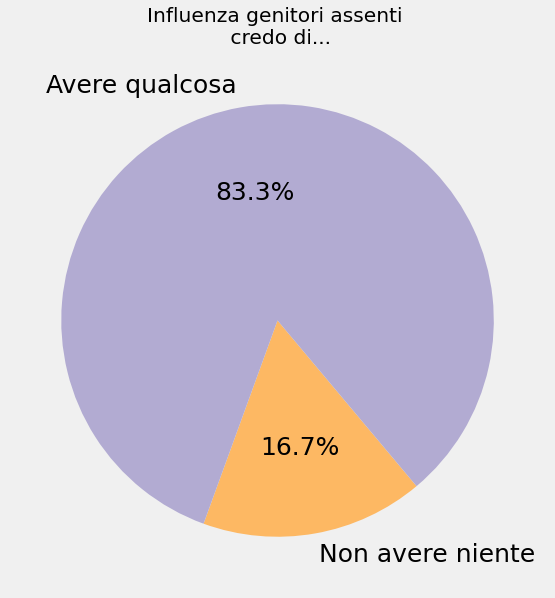

In [36]:
ass=sondaggio["Nella mia vita  [Da piccolo/a i miei genitori sono stati assenti]"]=="Vero"
credo = sondaggio["Credo di"].str.get_dummies(sep= ", ")
niente = credo["Credo di non avere niente"]==1
num = len(sondaggio[(ass)&(niente)])
assenti = len(sondaggio[ass])-num
mycolors = ["#fdb863", "#b2abd2"]
torta([num,assenti],["Non avere niente","Avere qualcosa"],mycolors,"Influenza genitori assenti \n credo di...","gen_ass.png")

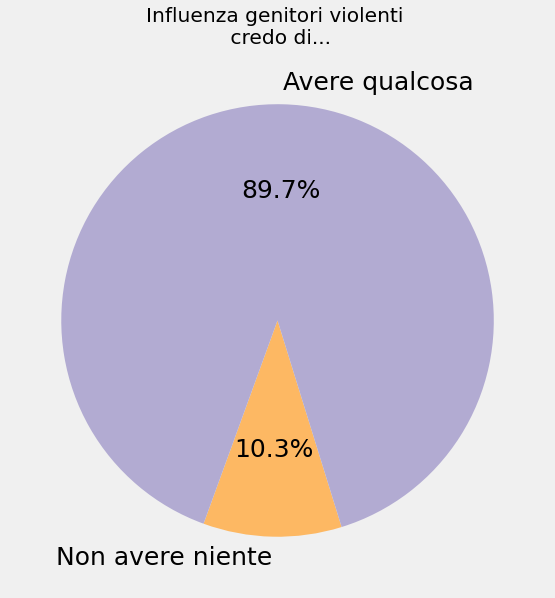

In [37]:
viol=sondaggio["Nella mia vita  [Da piccolo/a i miei genitori sono stati violenti]"]=="Vero"
credo = sondaggio["Credo di"].str.get_dummies(sep= ", ")
niente = credo["Credo di non avere niente"]==1
num = len(sondaggio[(viol)&(niente)])
assenti = len(sondaggio[viol])-num
mycolors = ["#fdb863", "#b2abd2"]
torta([num,assenti],["Non avere niente","Avere qualcosa"],mycolors,"Influenza genitori violenti \n credo di...","gen_viol.png")

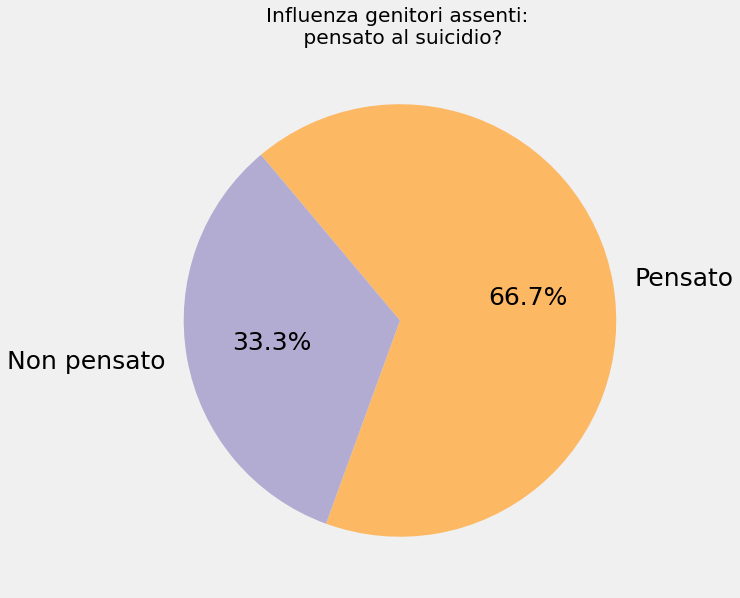

In [38]:
sui=sondaggio["Nella mia vita  [Ho pensato/penso al suicidio]"]=="Vero"
num = len(sondaggio[(ass)&(sui)])
assenti = len(sondaggio[ass])-num
mycolors = ["#fdb863", "#b2abd2"]
torta([num,assenti],["Pensato","Non pensato"],mycolors,"Influenza genitori assenti: \n pensato al suicidio?","gen_ass_sui.png")

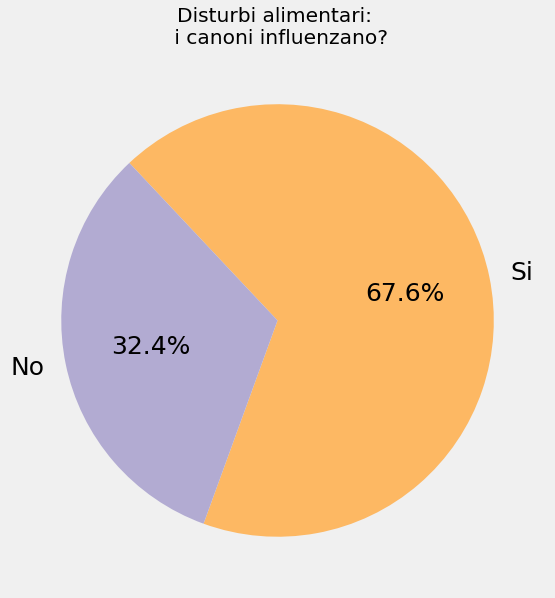

In [39]:
dist_al = credo["Avere un disturbo alimentare"]==1
canoni = sondaggio["Questi fattori influenzano la tua salute mentale IN NEGATIVO? [La società e i canoni estetici]"]=="Sì"
num = len(sondaggio[(dist_al)&(canoni)])
no = len(sondaggio[dist_al])-num
torta([num,no],["Si","No"],mycolors,"Disturbi alimentari: \n i canoni influenzano?","alim_cano.png")

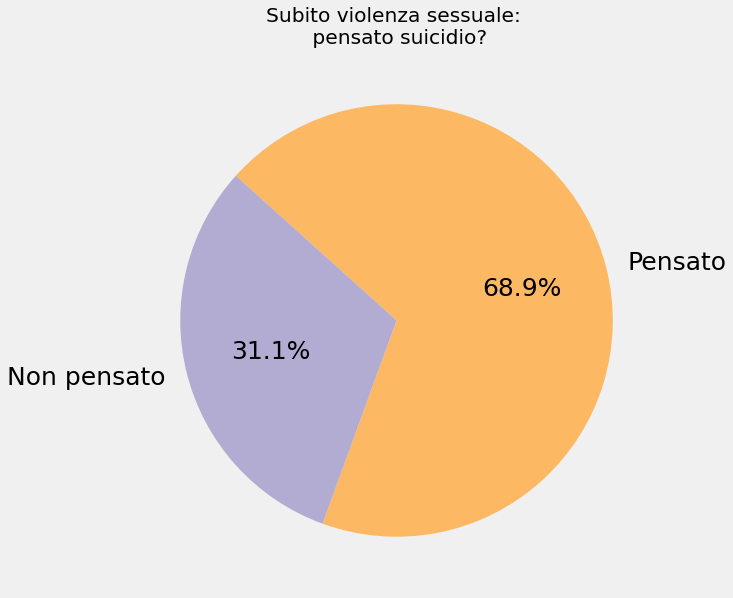

In [40]:
#subito violenze + suicidio
molestie = sondaggio["Nella mia vita  [Ho subito/subisco molestie sessuali]"]=="Vero"
sui=sondaggio["Nella mia vita  [Ho pensato/penso al suicidio]"]=="Vero"
num = len(sondaggio[(molestie)&(sui)])
no = len(sondaggio[molestie])-num
torta([num,no],["Pensato","Non pensato"],mycolors,"Subito violenza sessuale: \n pensato suicidio?","viol_sui.png")

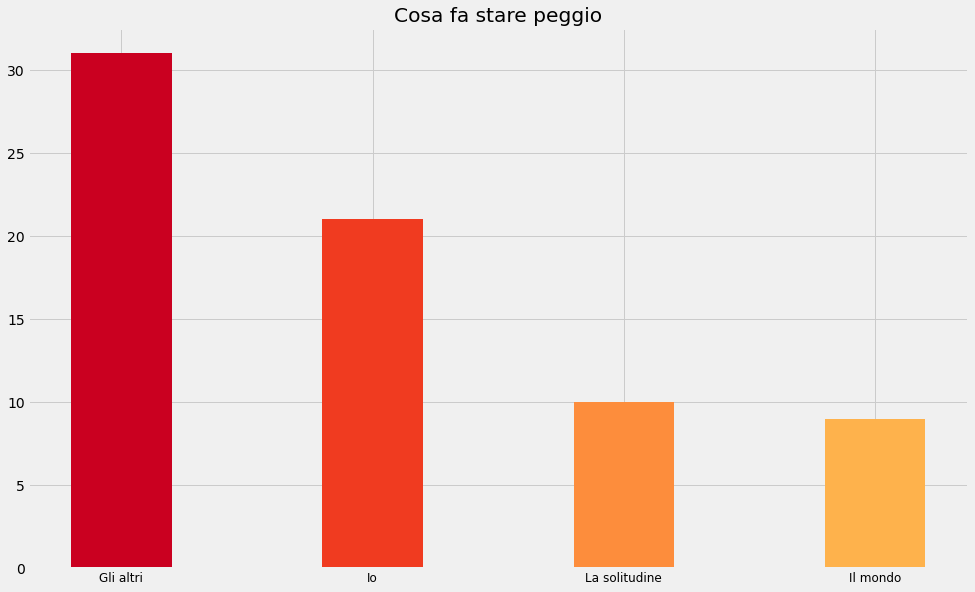

In [41]:
#conteggio manuale (risposta aperta)
negativo = np.array([31,21,10,9])
mylabels = ["Gli altri", "Io", "La solitudine", "Il mondo"]
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#dadaeb','#bcbddc']
barre(mylabels,negativo,mycolors,"Cosa fa stare peggio","negativamente.png")

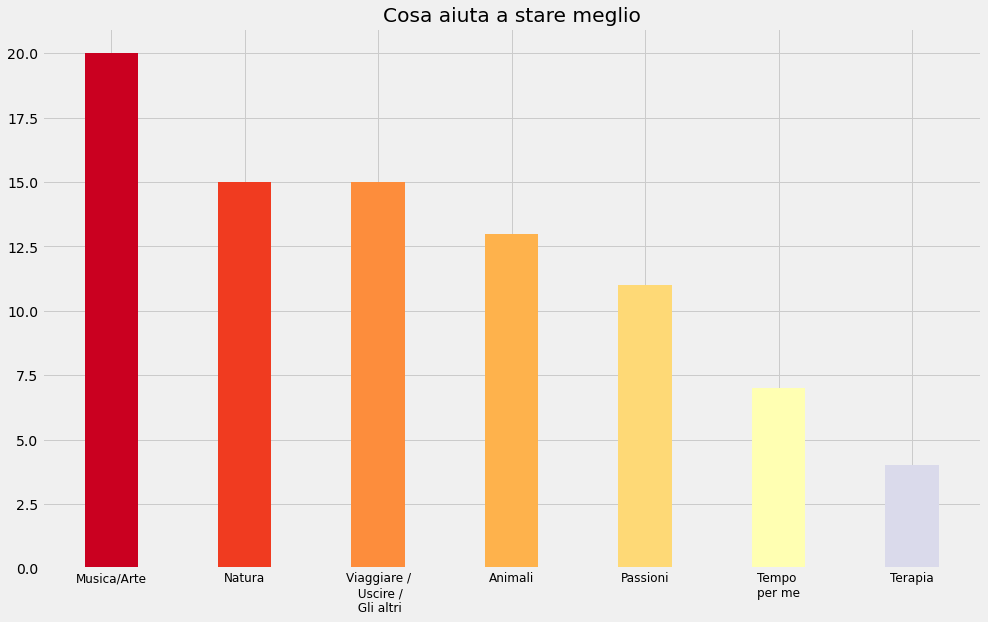

In [42]:
#conteggio manuale (risposta aperta)
positivo = np.array([20, 15, 15, 13, 11, 7, 4])
mylabels = ["Musica/Arte", "Natura", "Viaggiare /\n Uscire /\n Gli altri", "Animali", "Passioni", "Tempo \nper me", "Terapia" ]
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#dadaeb','#bcbddc']
barre(mylabels,positivo,mycolors,"Cosa aiuta a stare meglio","Positivamente.png")

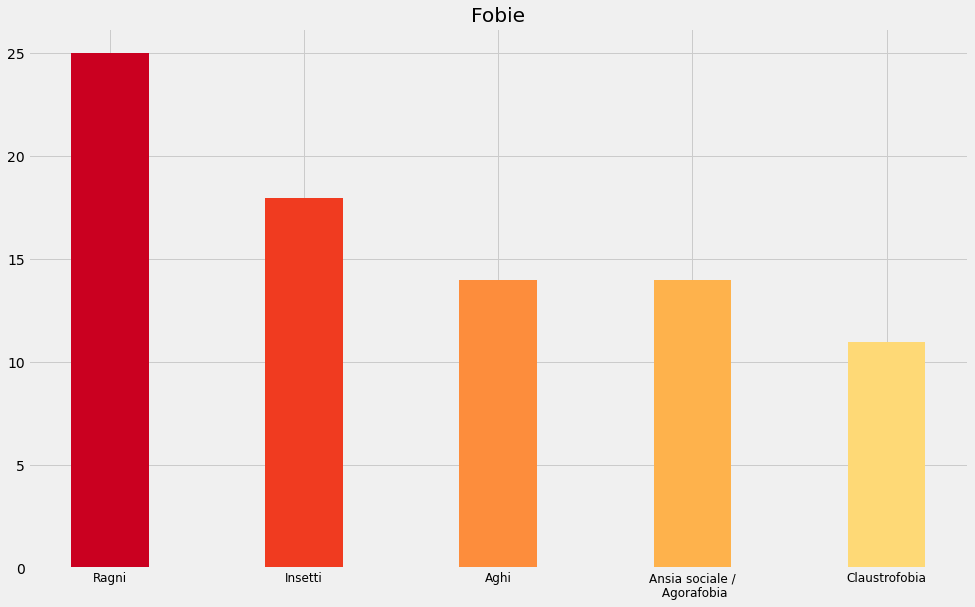

In [43]:
#conteggio manuale (risposta aperta)
fobie = np.array([25, 18, 14, 14, 11])
mylabels = ["Ragni", "Insetti", "Aghi", "Ansia sociale /\n Agorafobia", "Claustrofobia"]
mycolors = ['#ca0020','#f03b20','#fd8d3c','#feb24c','#fed976','#ffffb2','#dadaeb','#bcbddc']

barre(mylabels,fobie,mycolors,"Fobie","fobie.png")

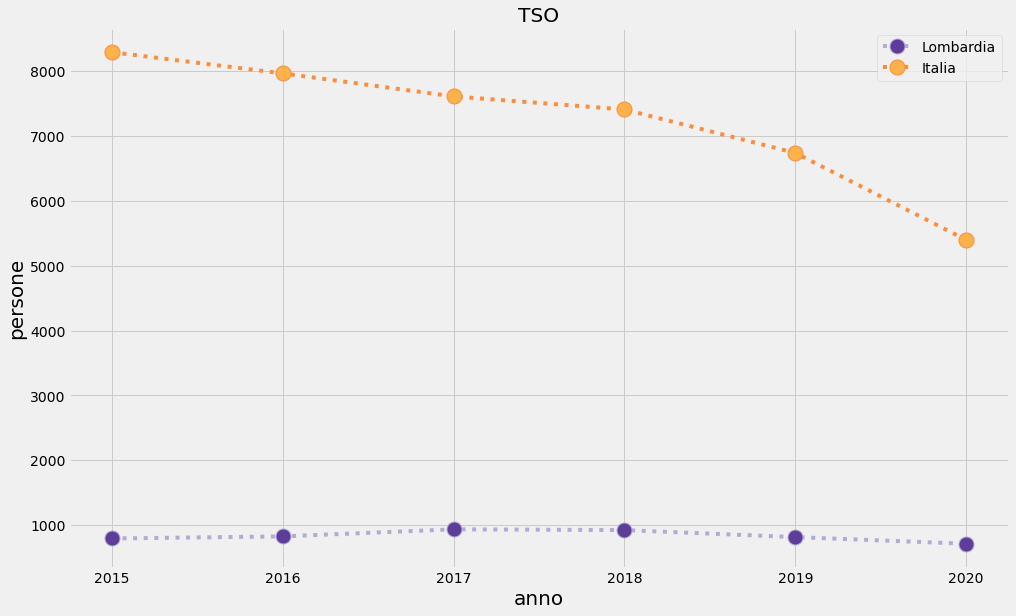

In [44]:
#dati inseriti manualmente (non presente csv) da ministero della salute
x = np.array([2015, 2016, 2017, 2018, 2019, 2020])
y_lomb = np.array([797, 829, 938, 926, 818, 716])

y_ita = np.array([8289, 7963, 7608, 7407, 6737, 5398])

plt.plot(x, y_lomb, marker='o' , mfc='#5e3c99', ms=15, linestyle = 'dotted', color='#b2abd2', label="Lombardia" )
plt.plot(x, y_ita, marker='o' , mfc='#feb24c', ms=15, linestyle = 'dotted', color='#fd8d3c', label= "Italia" )
plt.xlabel("anno", size='20')

plt.ylabel("persone", size='20')
plt.title("TSO")
plt.legend()
plt.savefig('tso.png')

<Figure size 1080x667.477 with 0 Axes>

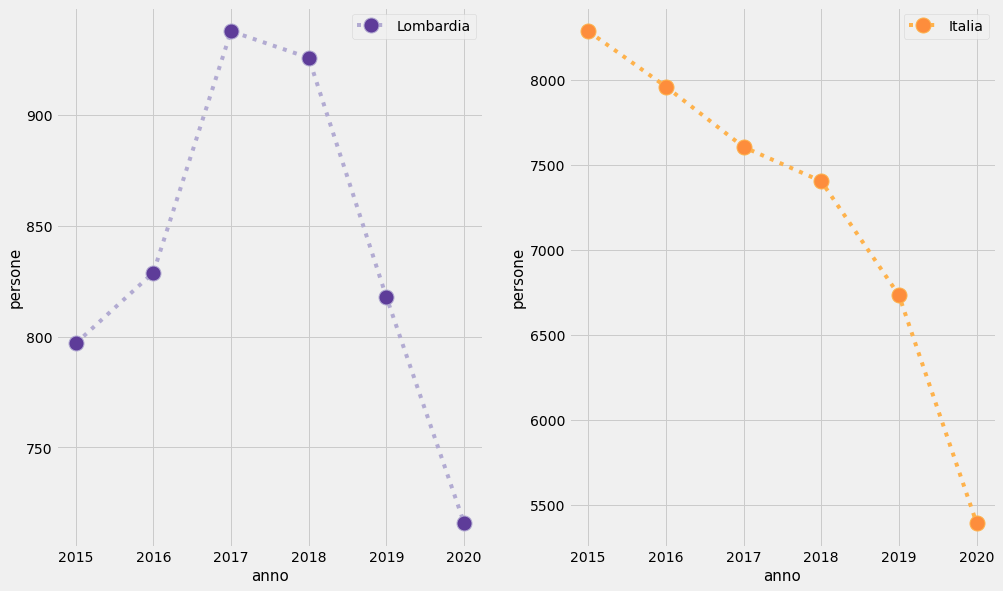

In [45]:
#dati inseriti manualmente (non presente csv) da ministero della salute
x = np.array([2015, 2016, 2017, 2018, 2019, 2020])
y_lomb = np.array([797, 829, 938, 926, 818, 716])

y_ita = np.array([8289, 7963, 7608, 7407, 6737, 5398])

plt.savefig('tso.png')


plt.figure()
 
plt.subplot(121)
plt.plot(x, y_lomb, marker='o' , mfc='#5e3c99', ms=15, linestyle = 'dotted', color='#b2abd2',label="Lombardia")
plt.xlabel("anno", size='15')
plt.ylabel("persone", size='15')
plt.legend()

plt.subplot(122)
plt.plot(x, y_ita, marker='o' , mfc='#fd8d3c', ms=15, linestyle = 'dotted', color='#feb24c',label="Italia")

plt.xlabel("anno", size='15')
plt.ylabel("persone", size='15')
plt.legend()
plt.savefig('tso_confronto.png')

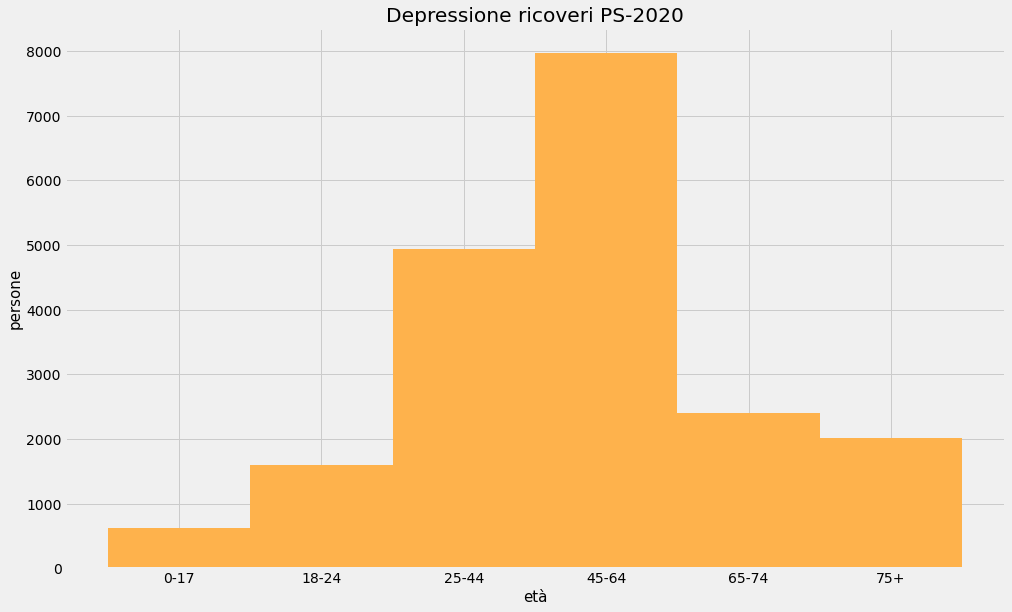

In [46]:
#dati inseriti manualmente (non presente csv) da ministero della salute
age= np.array(["0-17","18-24","25-44","45-64","65-74","75+"])
value= np.array([626,1602,4944,7965,2403,2018])
plt.bar(age, value, width=1, color= '#feb24c' )
plt.title("Depressione ricoveri PS-2020")
plt.xlabel("età", size='15')
plt.ylabel("persone", size='15')
plt.savefig('ricoveri_depr.png')

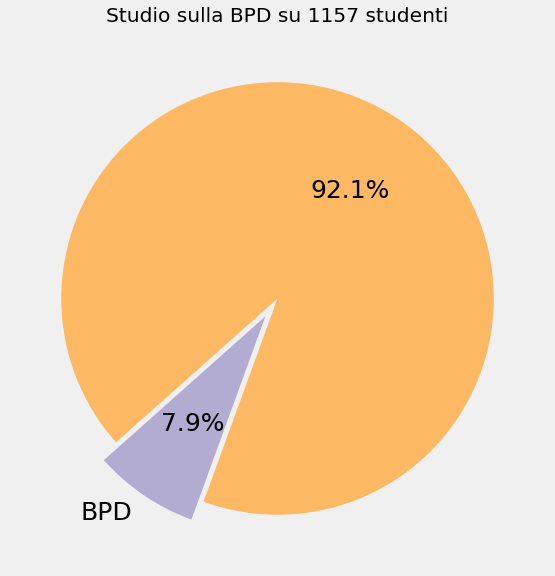

In [47]:
#dati inseriti manualmente da articolo scientifico
bpd = 31+31+29
no_bpd = 1157-bpd
mycolors = ["#fdb863", "#b2abd2"]
torta([no_bpd,bpd],[" ","BPD"],mycolors,"Studio sulla BPD su 1157 studenti","bpd_studio.png", [0, 0.1])

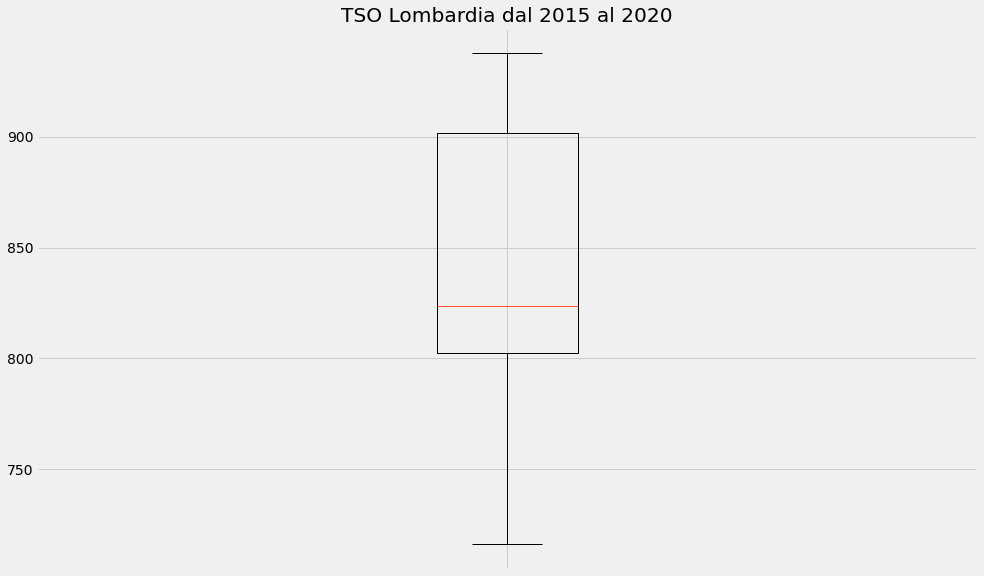

In [48]:
#dati inseriti manualmente (non presente csv) da ministero della salute
plt.boxplot(y_lomb,labels=[""])
plt.title("TSO Lombardia dal 2015 al 2020")
plt.savefig('box_lomb.png')

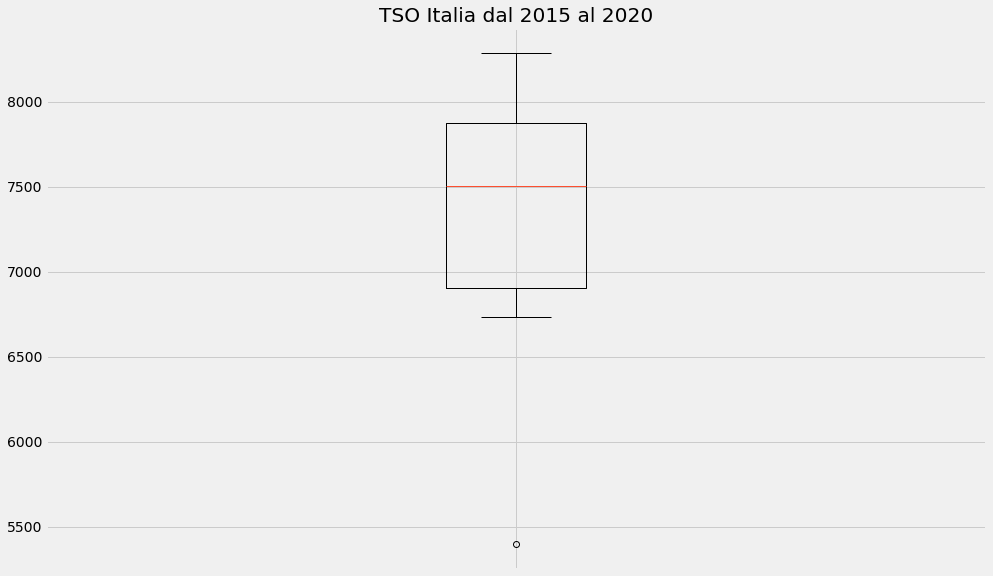

In [49]:
#dati inseriti manualmente (non presente csv) da ministero della salute
plt.boxplot(y_ita,labels=[""])
plt.title("TSO Italia dal 2015 al 2020")
plt.savefig('box_ita.png')

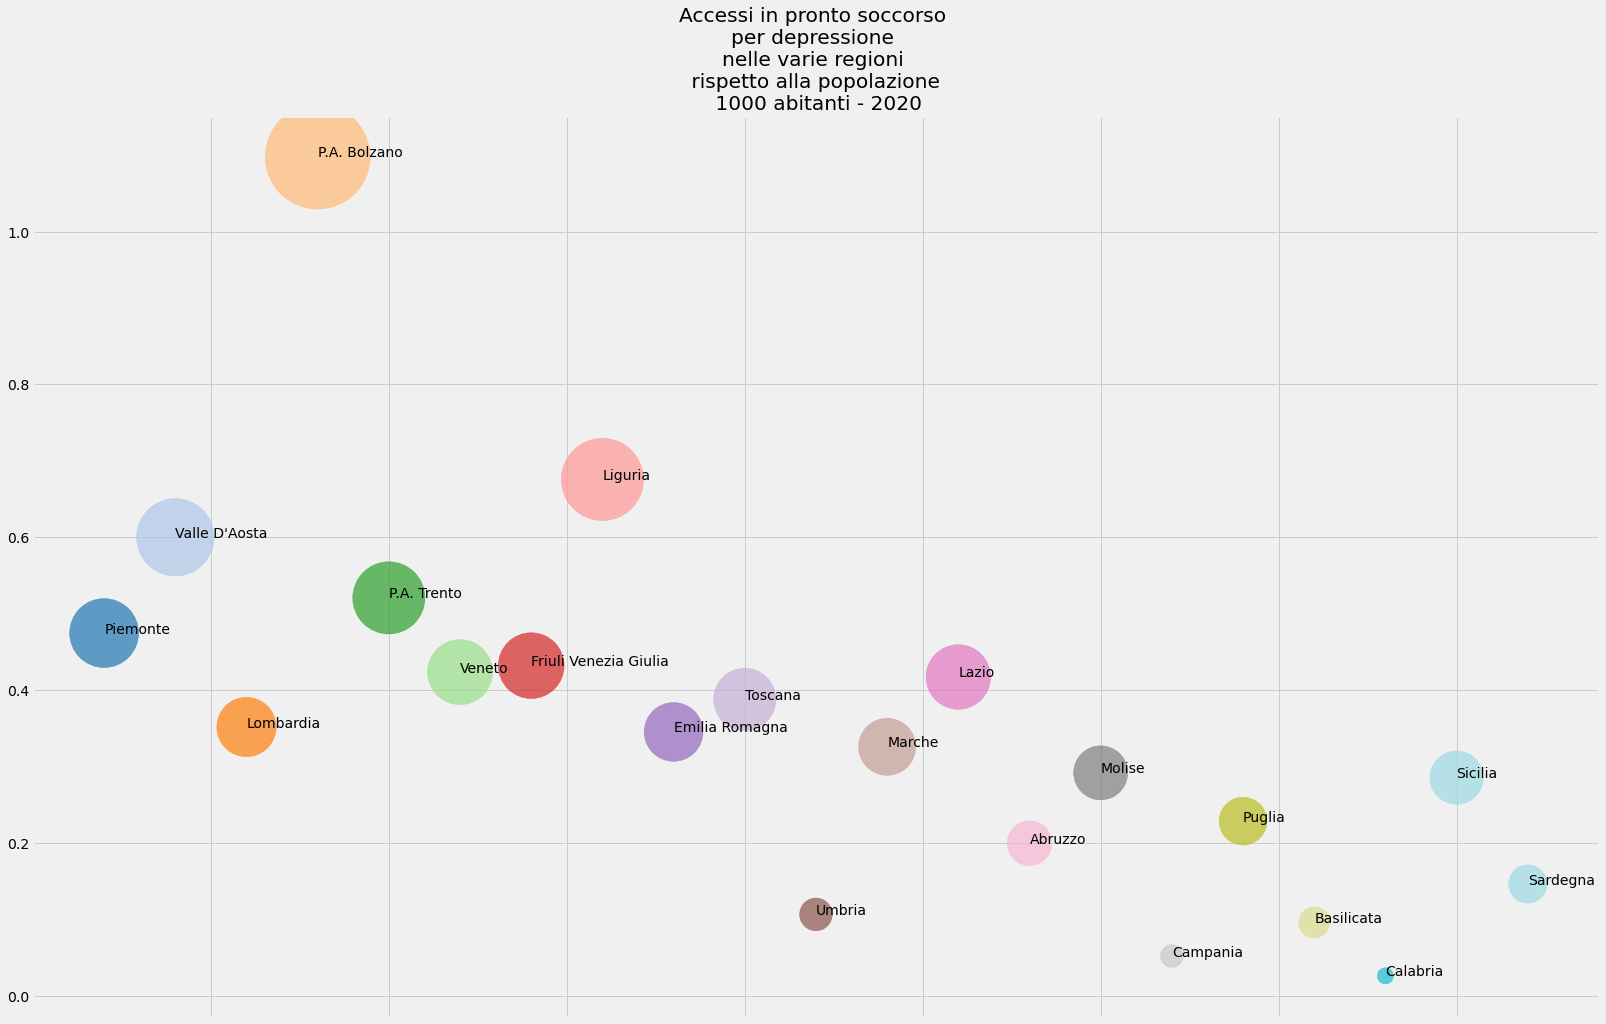

In [50]:
#dati inseriti manualmente (non presente csv) da ministero della salute
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
y = [2068,75,3539,571,276,2078,525,1048,1540,1447,94,497,2453,262,89,302,921,54,51,1428,240]
colors = np.arange(0,210,10)
pop = [4356,125,10060,520,530,4906,1215,1551,4459,3730,882,1525,5879,1312,305,5802,4029,562,1947,5000,1640]
div = np.divide(y, pop)
n = ["Piemonte","Valle D'Aosta","Lombardia","P.A. Bolzano","P.A. Trento","Veneto","Friuli Venezia Giulia","Liguria","Emilia Romagna","Toscana","Umbria","Marche","Lazio","Abruzzo","Molise","Campania","Puglia", "Basilicata", "Calabria", "Sicilia", "Sardegna"]
plt.rc('figure', figsize=(25.0, 25.0/golden))
fig, ax = plt.subplots()
ax.scatter(x, div, c=colors, cmap='tab20', s=np.multiply(div,10000), alpha= 0.7)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], div[i]))


plt.title("Accessi in pronto soccorso \nper depressione \nnelle varie regioni \n rispetto alla popolazione \n 1000 abitanti - 2020")
ax.axes.xaxis.set_ticklabels([])
plt.savefig('depr_regioni.png')

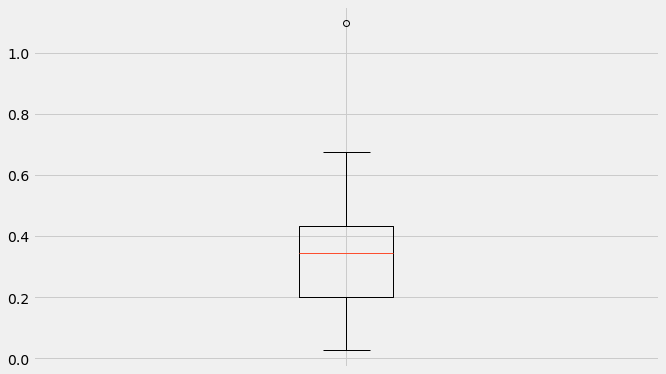

In [51]:
#dati inseriti manualmente (non presente csv) da ministero della salute
plt.rc('figure', figsize=(10.0, 10.0/golden))
plt.boxplot(div,labels=[""])
figsize=(15.0, 15.0/golden)
plt.savefig("box_regioni.png")

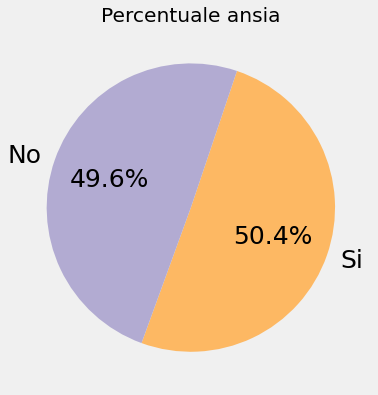

In [52]:
ansia = sondaggio["Credo di"].str.get_dummies(sep=', ').sum()["Avere un disturbo legato all'ansia"]
tot = len(sondaggio)-ansia
mycolors = ["#fdb863", "#b2abd2"]
torta([ansia,tot],["Si","No"],mycolors,"Percentuale ansia","perc_ansia.png")

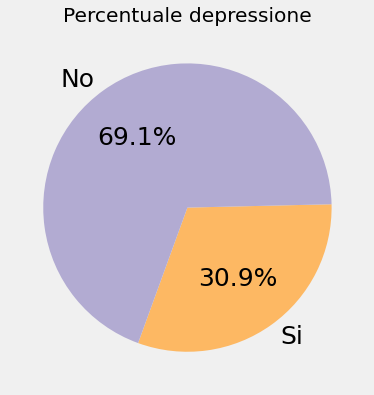

In [53]:
depre = sondaggio["Credo di"].str.get_dummies(sep=', ').sum()["Avere un disturbo legato alla depressione"]
tot = len(sondaggio)-depre
mycolors = ["#fdb863", "#b2abd2"]
torta([depre,tot],["Si","No"],mycolors,"Percentuale depressione","perc_depr.png")

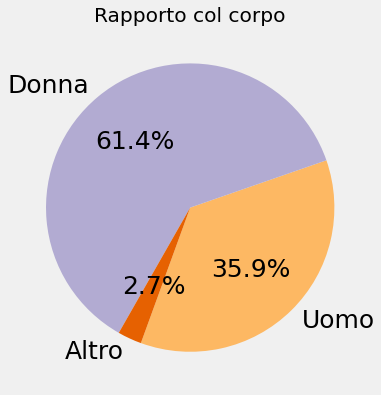

In [54]:
uomo_corpo= sondaggio[(sondaggio["Nella mia vita  [Ho/ho avuto un brutto rapporto con il mio corpo]"]=="Vero")&(sondaggio["Sono"]=="Uomo")]
donna_corpo= sondaggio[(sondaggio["Nella mia vita  [Ho/ho avuto un brutto rapporto con il mio corpo]"]=="Vero")&(sondaggio["Sono"]=="Donna")]
altro_corpo = sondaggio[(sondaggio["Nella mia vita  [Ho/ho avuto un brutto rapporto con il mio corpo]"]=="Vero")&(sondaggio["Sono"]=="Altro")]
mycolors = ["#fdb863", "#b2abd2", "#e66101"]
torta([len(uomo_corpo),len(donna_corpo),len(altro_corpo)],["Uomo","Donna","Altro"],mycolors,"Rapporto col corpo","rapporto_corpo.png")

In [55]:
len(donna_corpo)

137

In [56]:
sondaggio["Sono"].value_counts()

Donna                   216
Uomo                    175
Altro                     8
Preferisco non dirlo      2
Name: Sono, dtype: int64

In [ ]:
`∑«